# Code to calculate features and compare them with ground truth

This code calculates all 132 features (except for tonality up until now) found in ARAUS dataset of audios from soundscapes_augmented, and compares the resulting values with the ground-truth values of the dataset. Then, it presents one plot per feature, showing the calculated values VS the ground truth values + the resulting error.

### Imports

In [1]:
from SoundLights.features import extract_features
from Mosqito.loadFiles import load
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

### Load ground-truth values, meaning, the complete ARAUS dataset

Not responses.csv but the generated csv that includes the wav gains that are needed to transform the digital signal to the preassure signal [Pa]

In [ ]:
data_augmented = pd.read_csv("../data/responses_wav_gains.csv")

### Generate two new dataframes to store the data we will plot

Generate "new_df", to store the values we are calculating for the input soundscapes_augmented audios
Generate "aug_df", to store the ARAUS dataset data that corresponds to the input soundscape_augmented audios we are evaluating

In [ ]:
column_names = ['Savg_r','Smax_r','S05_r','S10_r','S20_r','S30_r','S40_r','S50_r','S60_r','S70_r','S80_r','S90_r','S95_r',
                         'Navg_r','Nrmc_r','Nmax_r','N05_r','N10_r','N20_r','N30_r','N40_r','N50_r','N60_r','N70_r','N80_r','N90_r','N95_r',
                         'Favg_r','Fmax_r','F05_r','F10_r','F20_r','F30_r','F40_r','F50_r','F60_r','F70_r','F80_r','F90_r','F95_r',
                         'LAavg_r','LAmin_r','LAmax_r','LA05_r','LA10_r','LA20_r','LA30_r','LA40_r','LA50_r','LA60_r','LA70_r','LA80_r','LA90_r','LA95_r',
                         'LCavg_r','LCmin_r','LCmax_r','LC05_r','LC10_r','LC20_r','LC30_r','LC40_r','LC50_r','LC60_r','LC70_r','LC80_r','LC90_r','LC95_r',
                         'Ravg_r','Rmax_r','R05_r','R10_r','R20_r','R30_r','R40_r','R50_r','R60_r','R70_r','R80_r','R90_r','R95_r',
                         'Tgavg_r','Tavg_r','Tmax_r','T05_r','T10_r','T20_r','T30_r','T40_r','T50_r','T60_r','T70_r','T80_r','T90_r','T95_r',
                         'M00005_0_r','M00006_3_r','M00008_0_r','M00010_0_r','M00012_5_r','M00016_0_r','M00020_0_r','M00025_0_r','M00031_5_r','M00040_0_r',
                         'M00050_0_r','M00063_0_r','M00080_0_r','M00100_0_r','M00125_0_r','M00160_0_r','M00200_0_r','M00250_0_r','M00315_0_r','M00400_0_r',
                         'M00500_0_r','M00630_0_r','M00800_0_r','M01000_0_r','M01250_0_r','M01600_0_r','M02000_0_r','M02500_0_r','M03150_0_r','M04000_0_r',
                         'M05000_0_r','M06300_0_r','M08000_0_r','M10000_0_r','M12500_0_r','M16000_0_r','M20000_0_r']

new_df = pd.DataFrame(columns=column_names)
aug_df = pd.DataFrame(columns=column_names)

### Calculate features with out formulas

In [2]:
# For each audio...
audios_path = "../data/soundscapes_augmented/"
for file in sorted(os.listdir(audios_path)):
        if file.endswith('.mp3') or file.endswith('.wav'):
            print("File ", file)
            # audio path
            audio_path=audios_path+file
            # Find the row in ARAUS dataset that the audio filename matches
            file_split=file.split("_")
            file_fold=int(file_split[1])
            file_participant="ARAUS_"+file_split[3]
            file_stimulus=int(file_split[5].split(".")[0])
            audio_info_aug = data_augmented[data_augmented['fold_r'] == file_fold]
            audio_info_aug = audio_info_aug[audio_info_aug['stimulus_index'] == file_stimulus]
            audio_info_aug = audio_info_aug[audio_info_aug['participant'] == file_participant] # Row of info from the ARAUS csv that corresponds to the evaluated soundscape_augmented audio

            # Get signal
            gain=audio_info_aug["wav_gain"].values[0]
            signalR, fs = load(audio_path, wav_calib=gain, ch=1) #R - SINGLE CHANNEL SIGNAL

            # Extract features for signal
            list=["loudness", "sharpness", "LA", "LC","frequency","roughness","fluctuation"]
            audio_features=extract_features(signalR, fs, list)

            # Save
            new_df = pd.concat([new_df, pd.DataFrame([audio_features])], ignore_index=True) # Save calculated features
            aug_df = pd.concat([aug_df, pd.DataFrame(audio_info_aug)], ignore_index=True) # Save info extracted from ARAUS dataset

            print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - -")



File  fold_0_participant_10001_stimulus_02.wav
Calculating loudness
Calculating sharpness
Calculating LA
Calculating LC
Calculating frequency features
Calculating roughness
Calculating fluctuation strength


/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_78765/2428161085.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  new_df = pd.concat([new_df, pd.DataFrame([audio_features])], ignore_index=True)
/var/folders/87/rtp1hhtx2tgcw5x4mgt4m00m0000gn/T/ipykernel_78765/2428161085.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aug_df = pd.concat([aug_df, pd.DataFrame(audio_info_aug)], ignore_index=True)


 - - - - - - - - - - - - - - - - - - - - - - - - - - - -
File  fold_0_participant_10001_stimulus_03.wav
Calculating loudness
Calculating sharpness
Calculating LA
Calculating LC
Calculating frequency features
Calculating roughness
Calculating fluctuation strength
 - - - - - - - - - - - - - - - - - - - - - - - - - - - -
File  fold_0_participant_10001_stimulus_04.wav
Calculating loudness
Calculating sharpness
Calculating LA
Calculating LC
Calculating frequency features
Calculating roughness
Calculating fluctuation strength
 - - - - - - - - - - - - - - - - - - - - - - - - - - - -
File  fold_0_participant_10001_stimulus_05.wav
Calculating loudness
Calculating sharpness
Calculating LA
Calculating LC
Calculating frequency features
Calculating roughness
Calculating fluctuation strength
 - - - - - - - - - - - - - - - - - - - - - - - - - - - -
File  fold_0_participant_10001_stimulus_06.wav
Calculating loudness
Calculating sharpness
Calculating LA
Calculating LC
Calculating frequency features
Cal

### Print results to compare ground-truth vs calculated

Savg_r


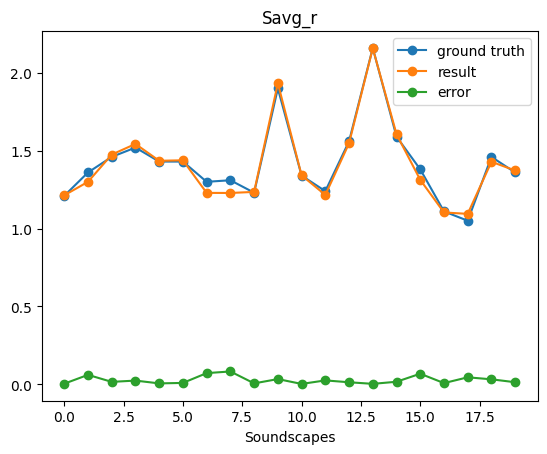

Smax_r


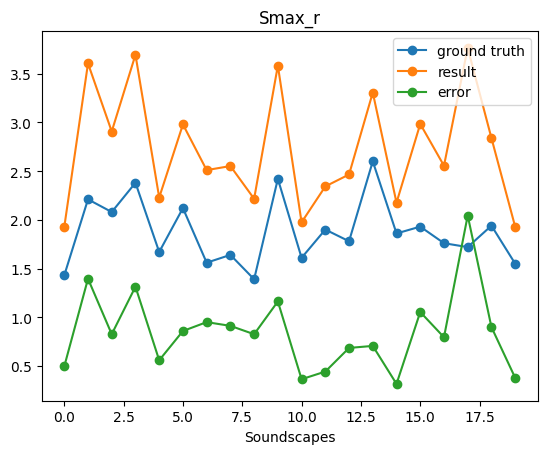

S05_r


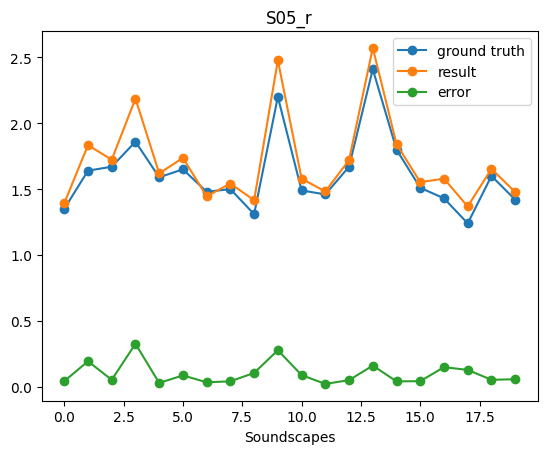

S10_r


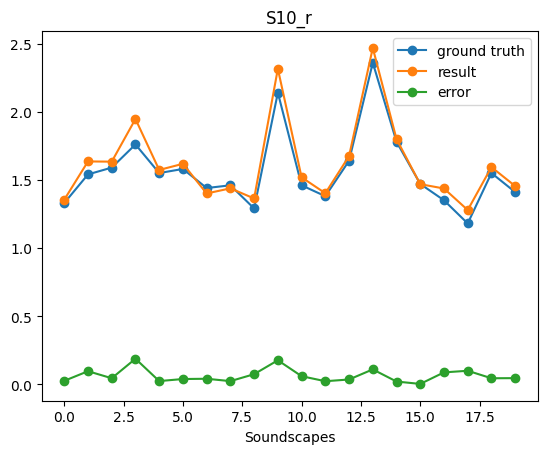

S20_r


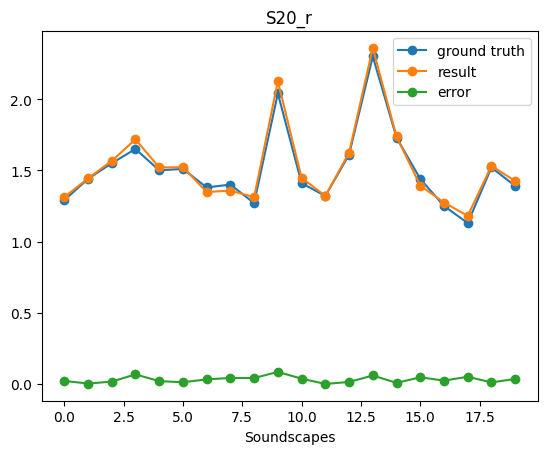

S30_r


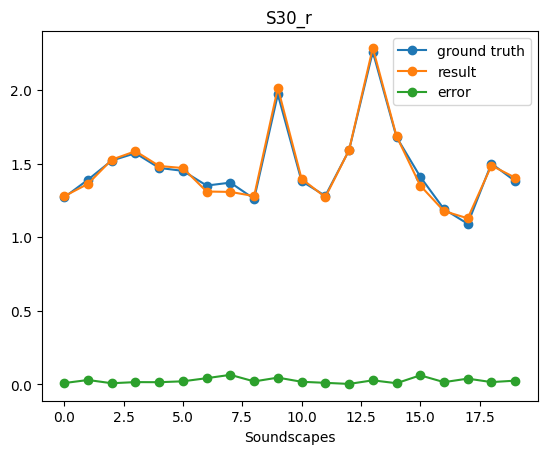

S40_r


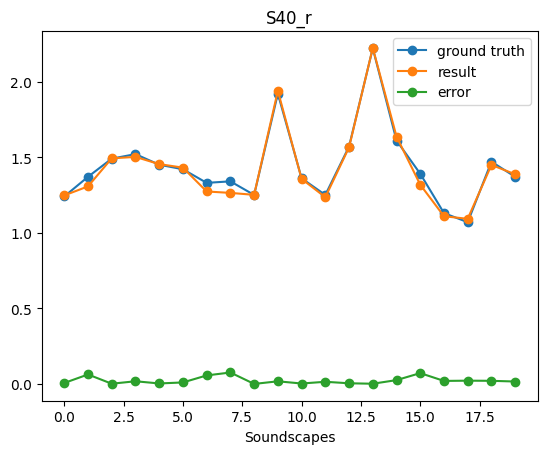

S50_r


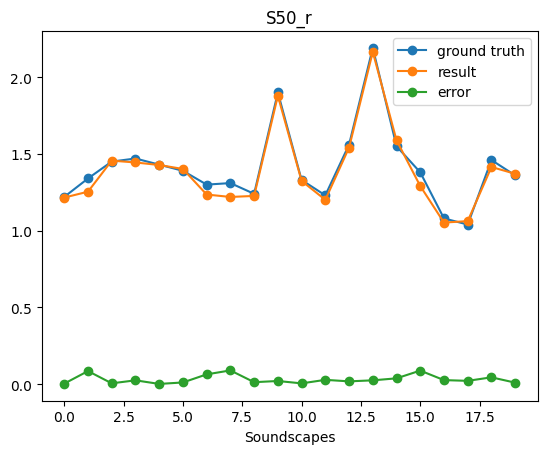

S60_r


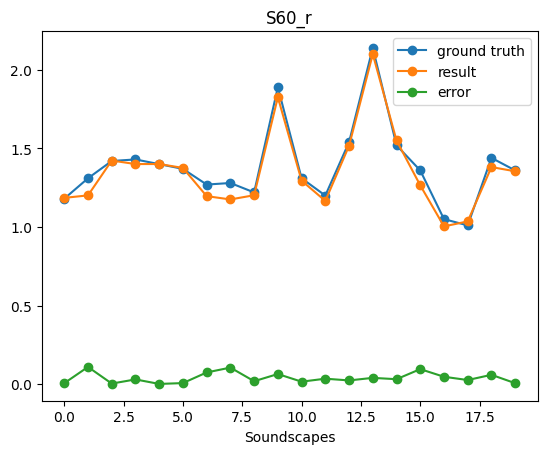

S70_r


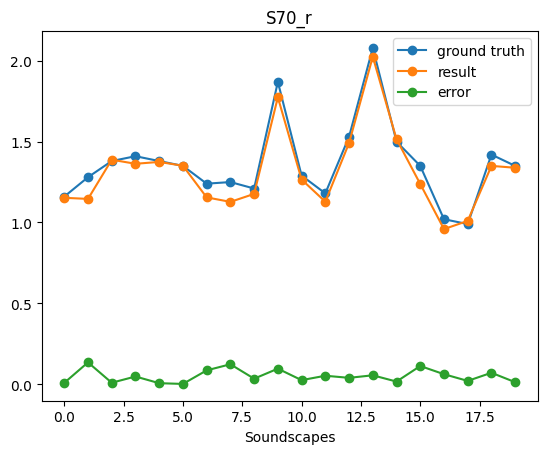

S80_r


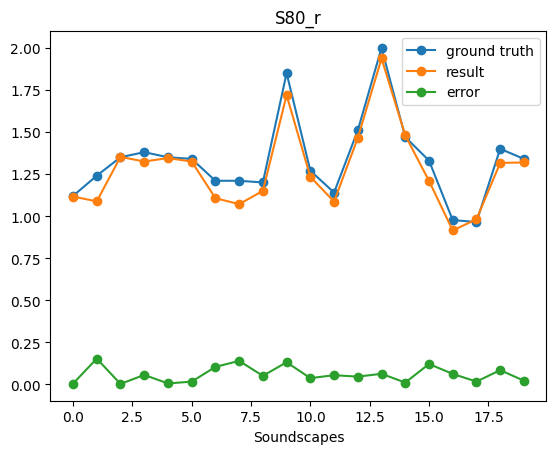

S90_r


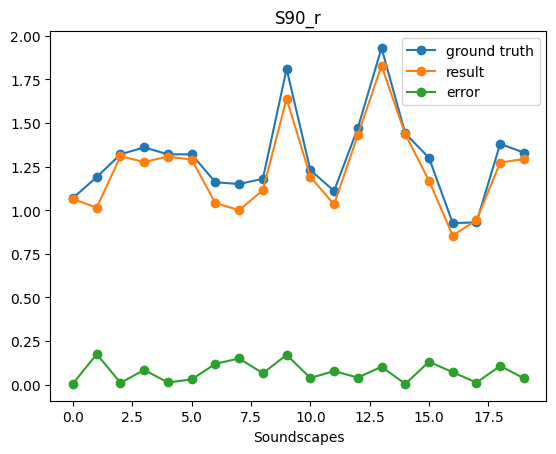

S95_r


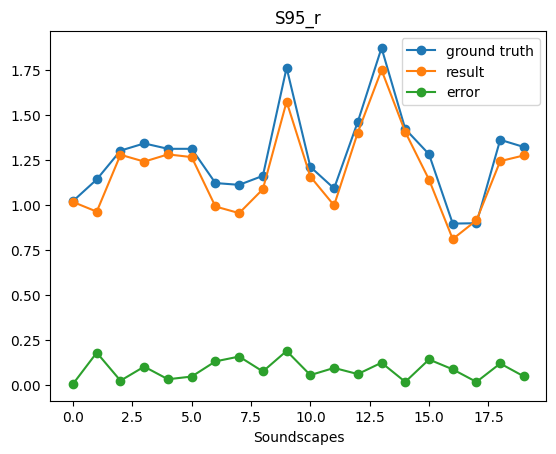

Navg_r


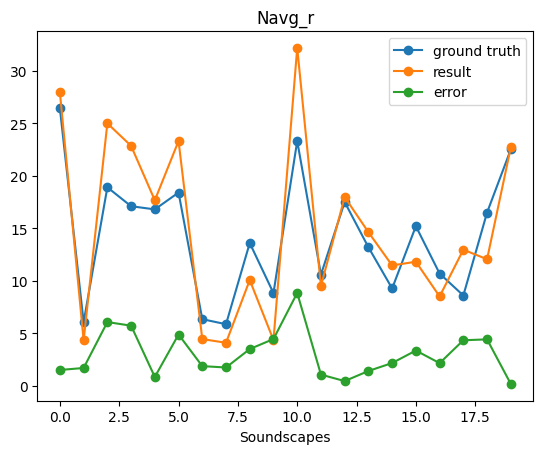

Nrmc_r


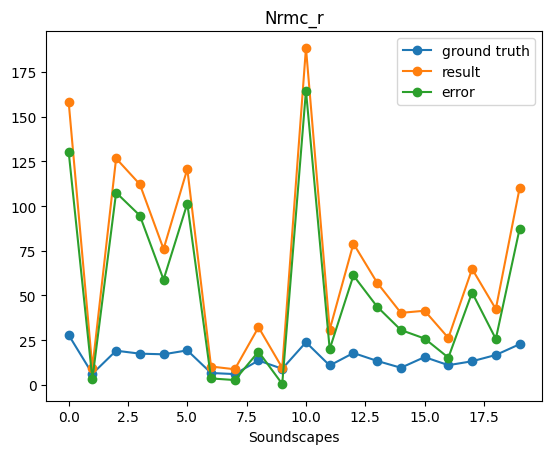

Nmax_r


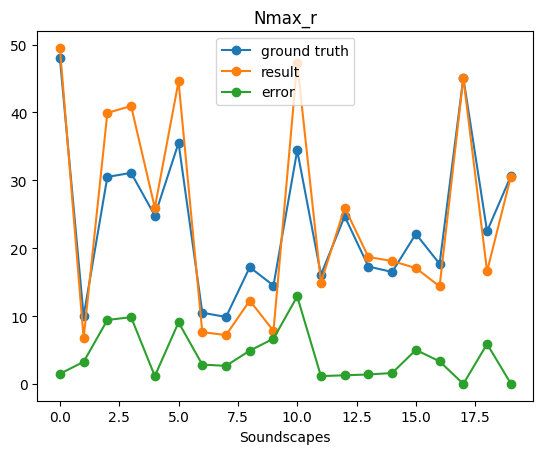

N05_r


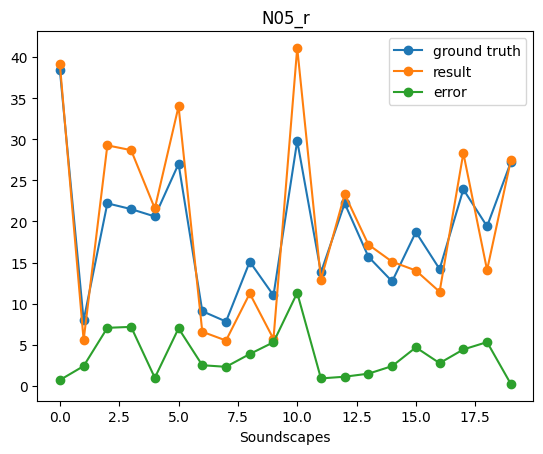

N10_r


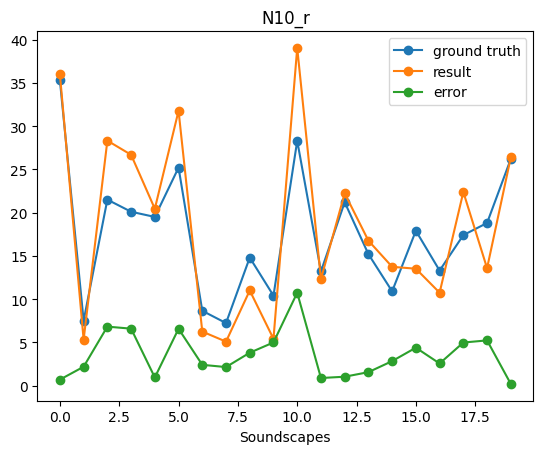

N20_r


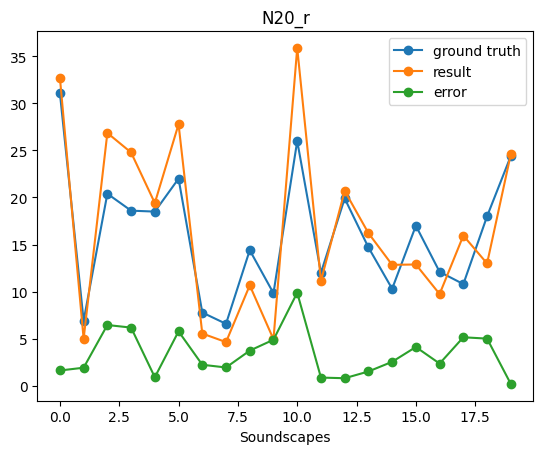

N30_r


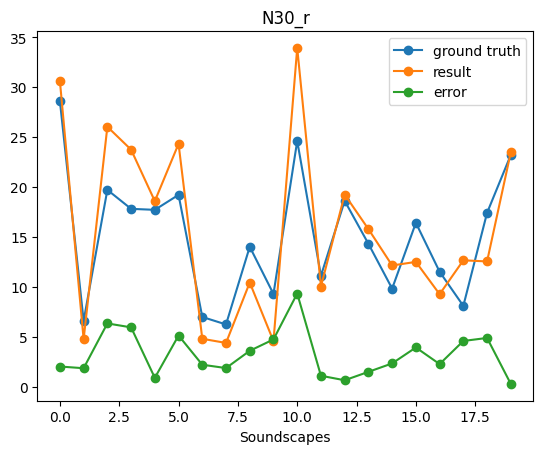

N40_r


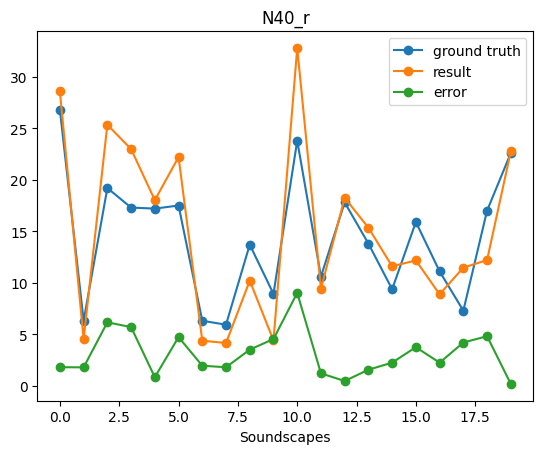

N50_r


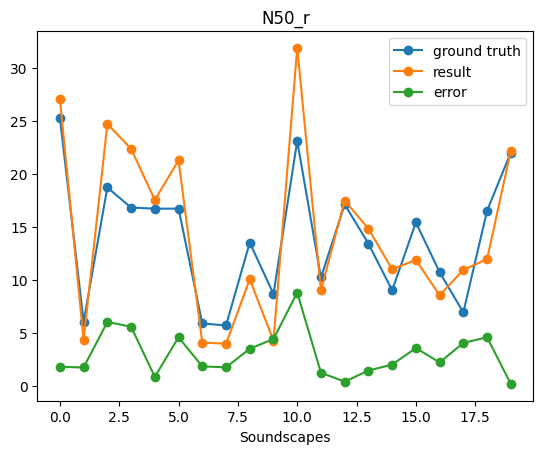

N60_r


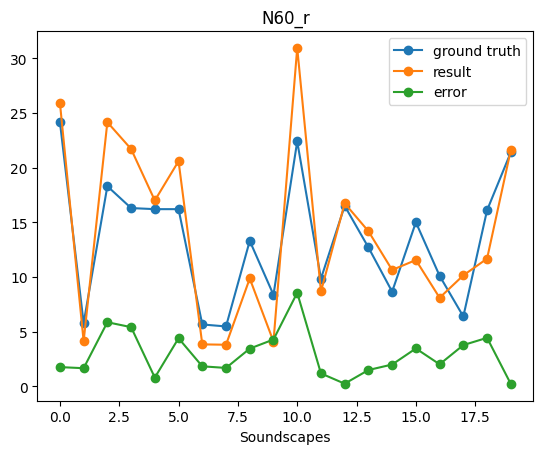

N70_r


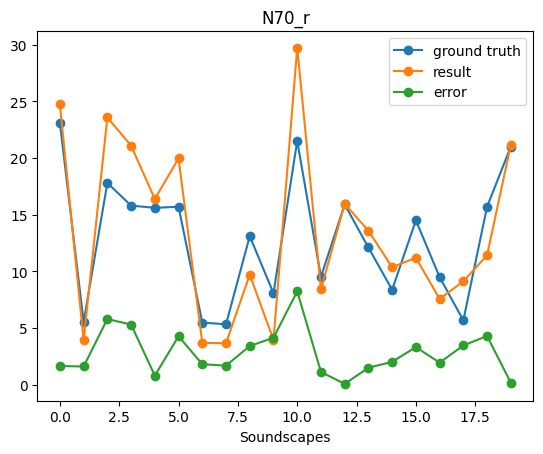

N80_r


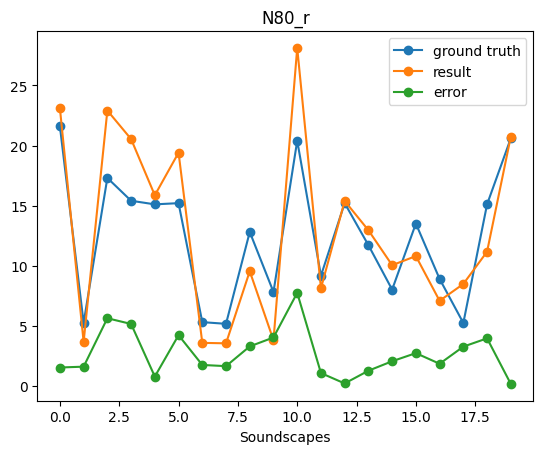

N90_r


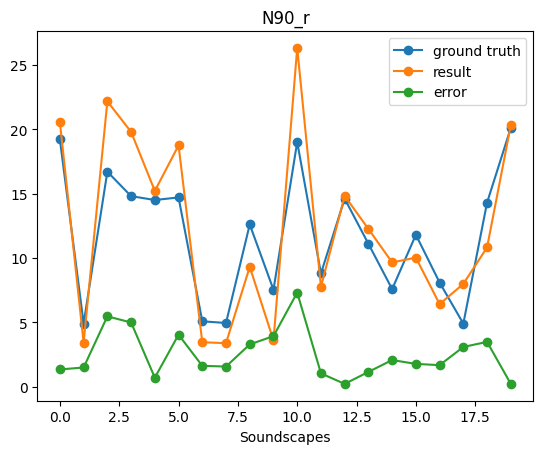

N95_r


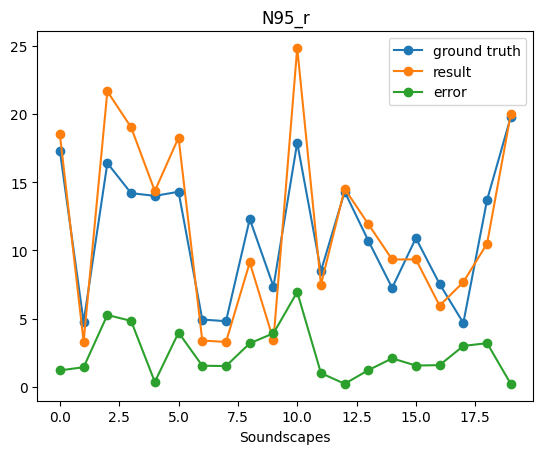

Favg_r


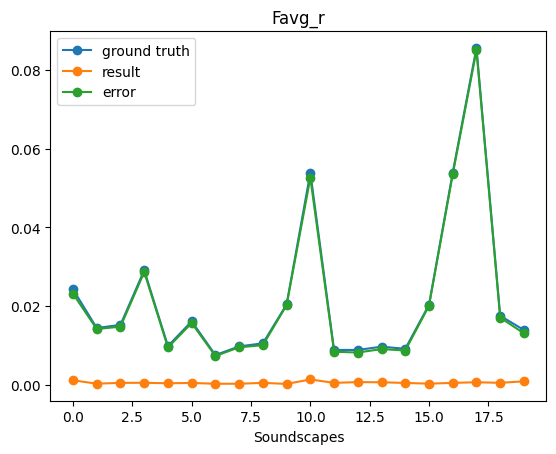

Fmax_r


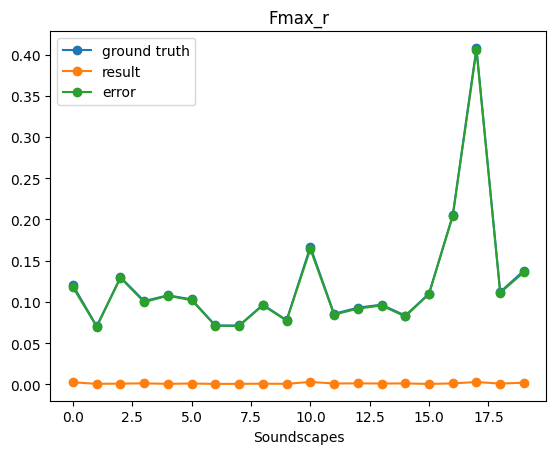

F05_r


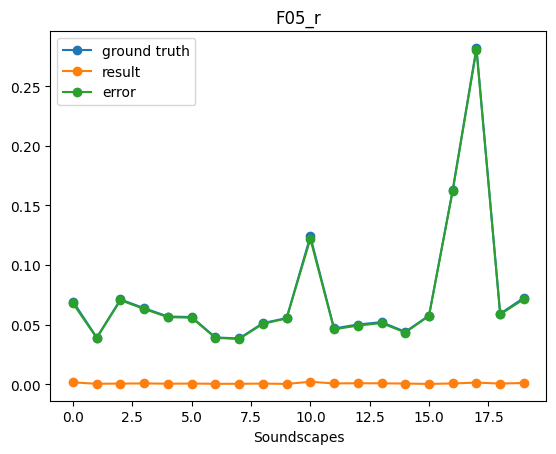

F10_r


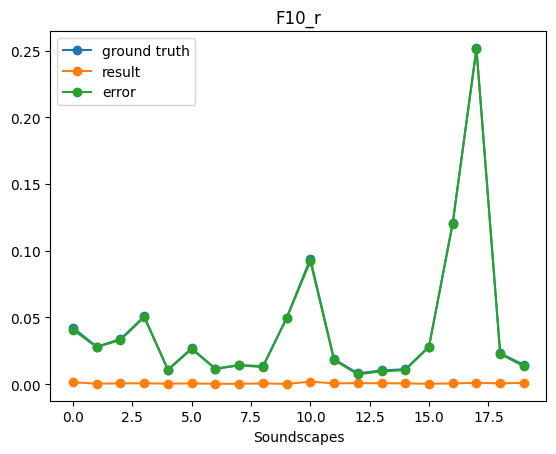

F20_r


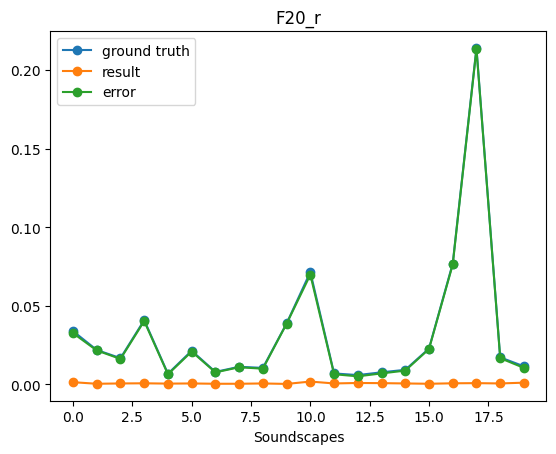

F30_r


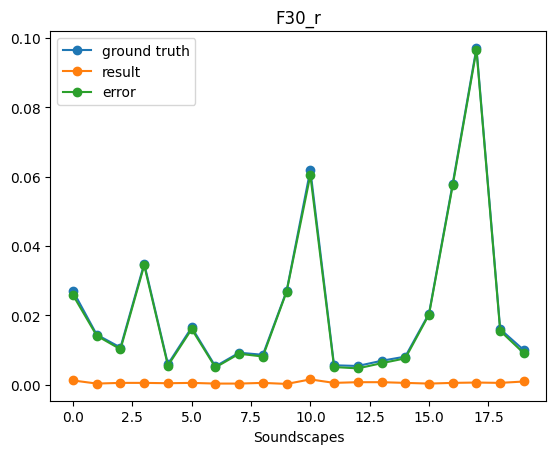

F40_r


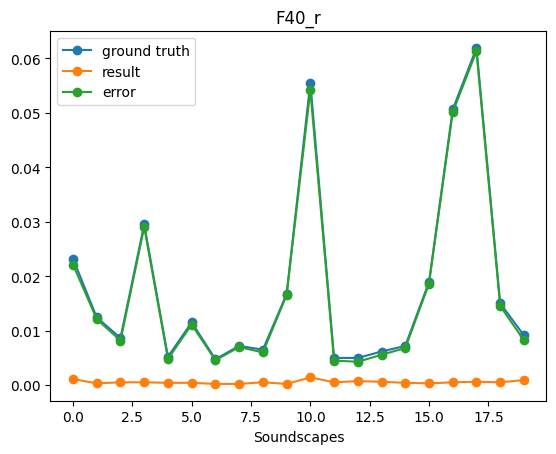

F50_r


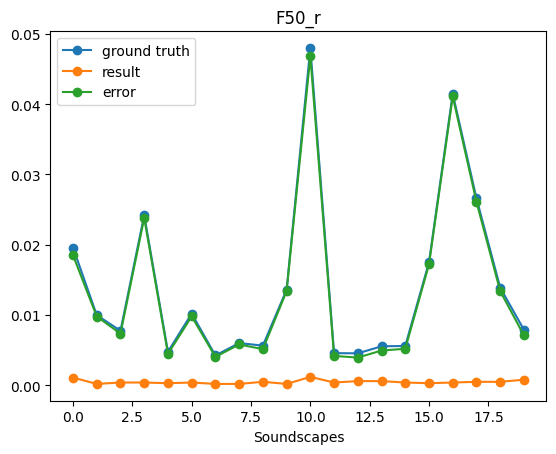

F60_r


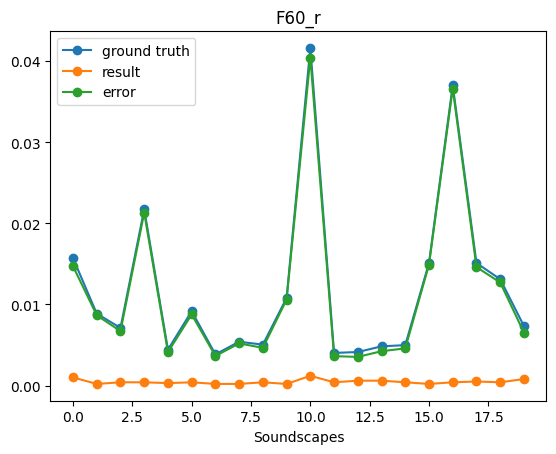

F70_r


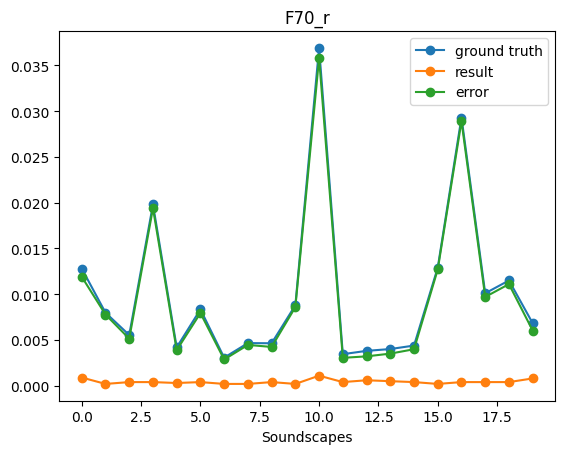

F80_r


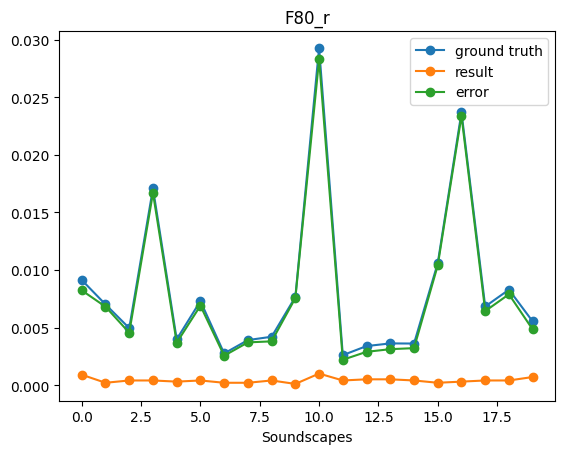

F90_r


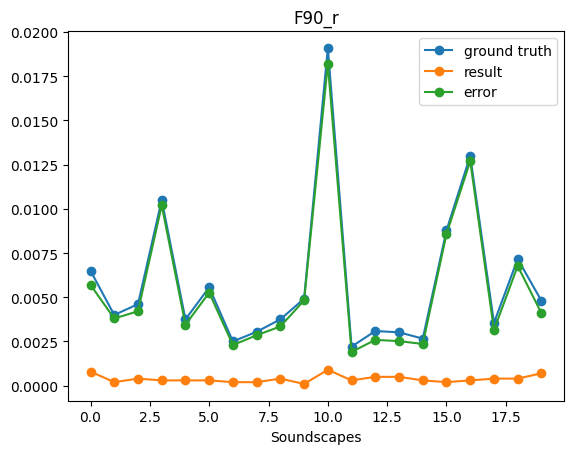

F95_r


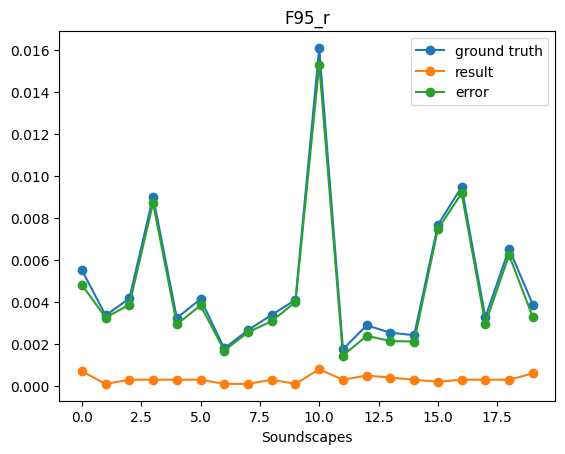

LAavg_r


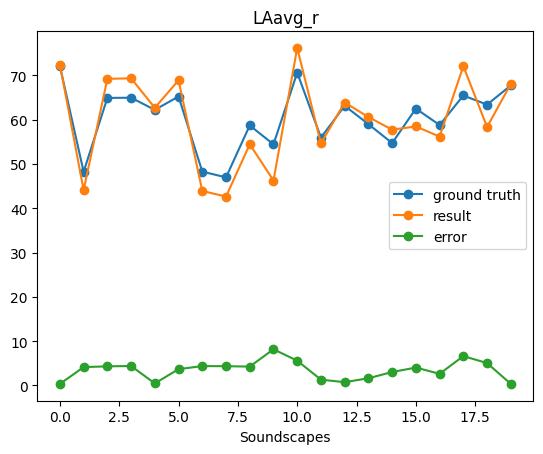

LAmin_r


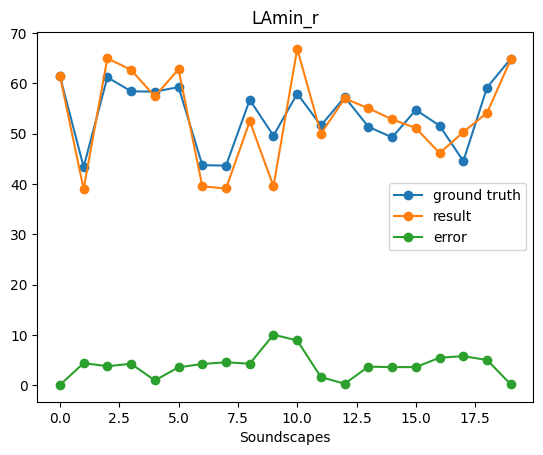

LAmax_r


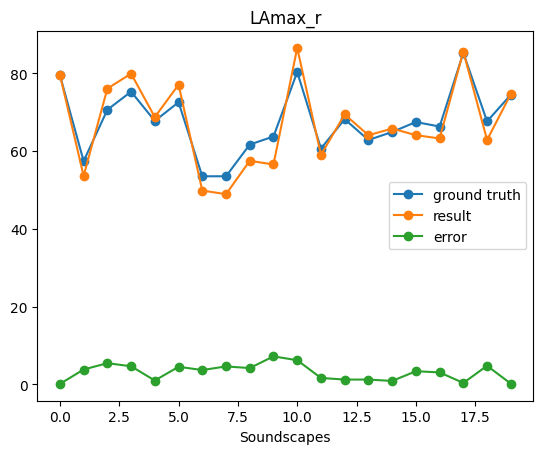

LA05_r


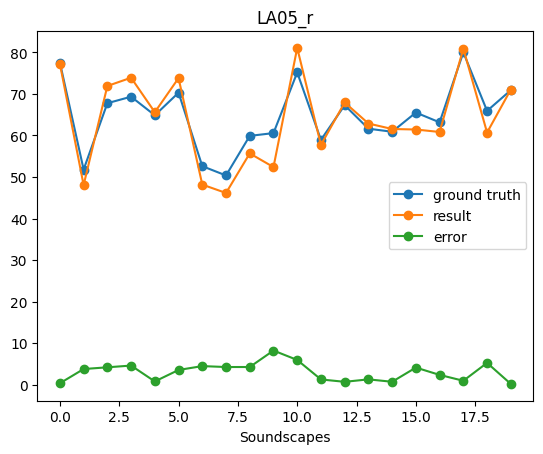

LA10_r


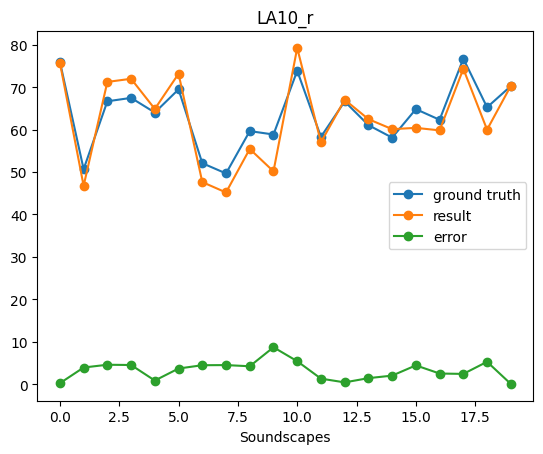

LA20_r


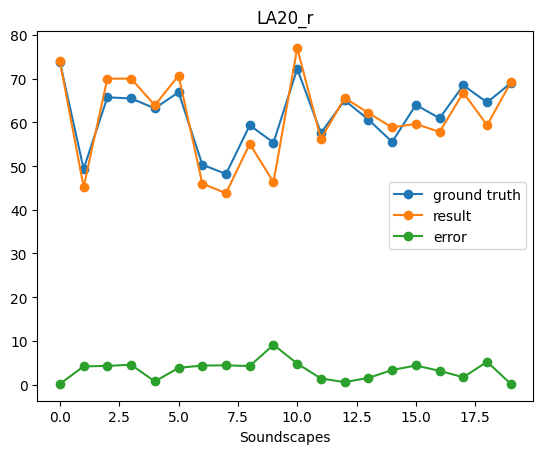

LA30_r


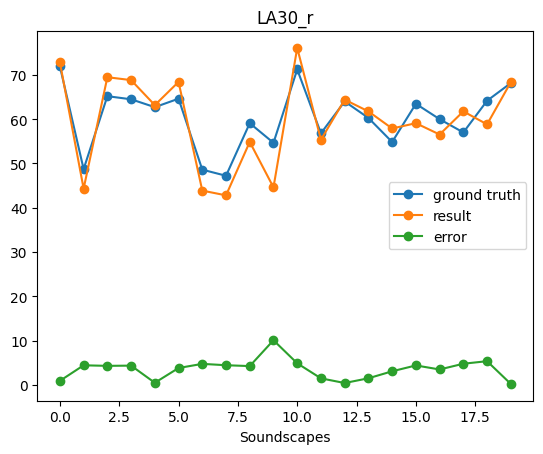

LA40_r


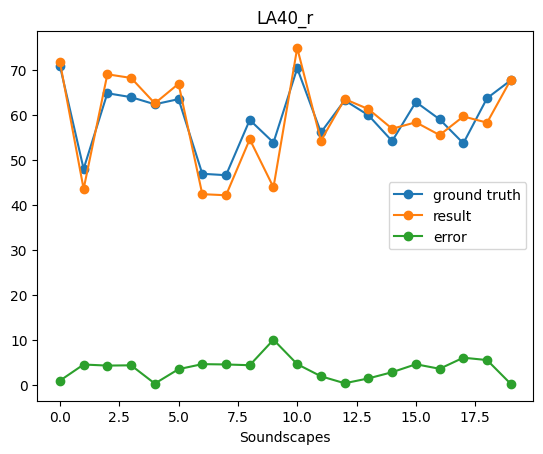

LA50_r


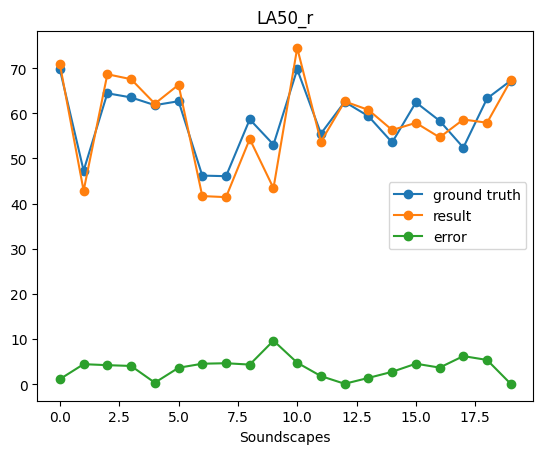

LA60_r


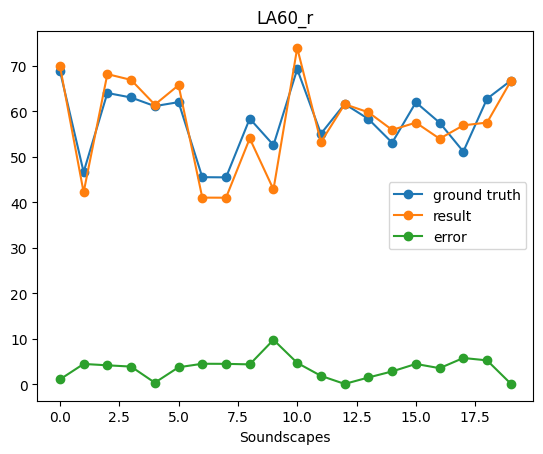

LA70_r


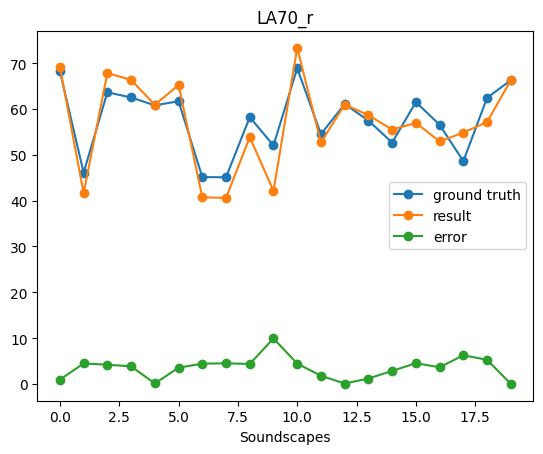

LA80_r


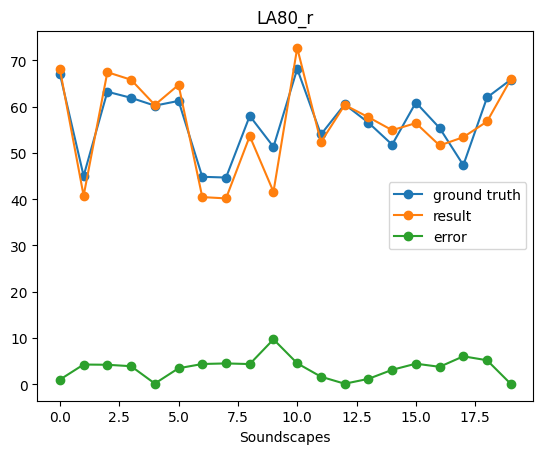

LA90_r


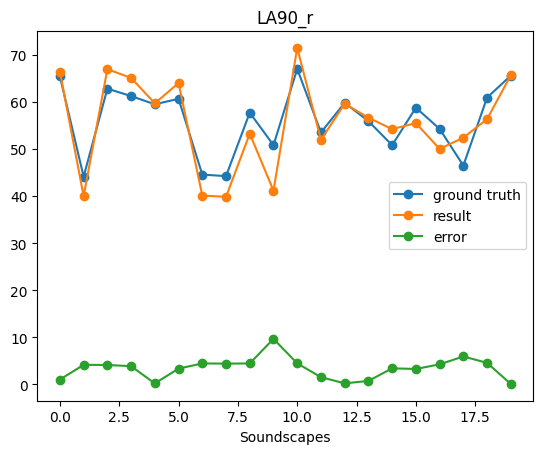

LA95_r


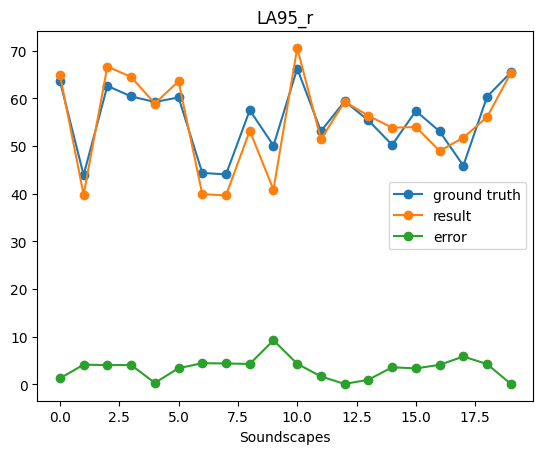

LCavg_r


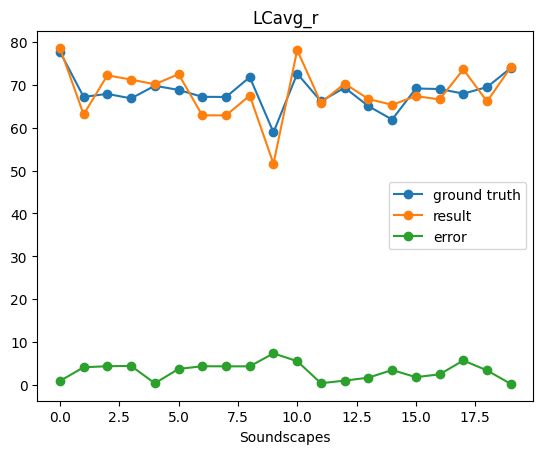

LCmin_r


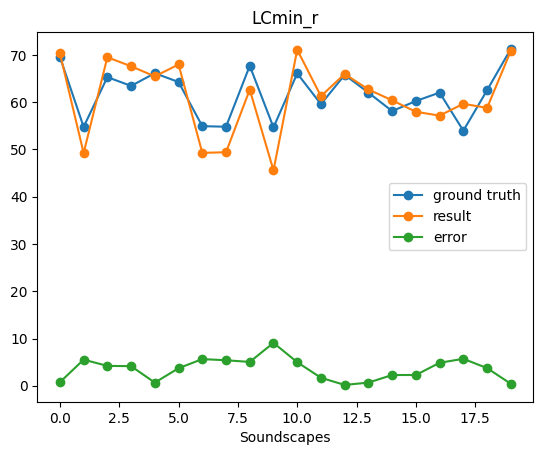

LCmax_r


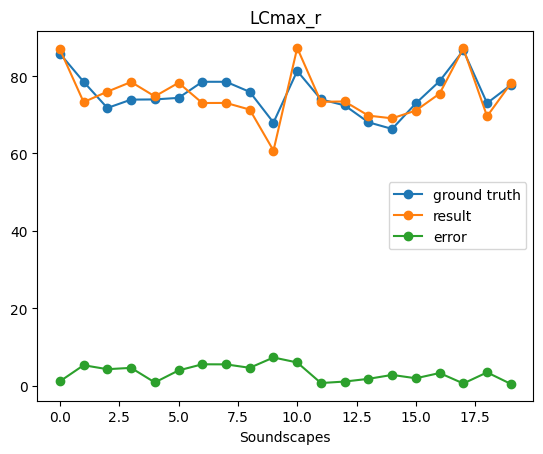

LC05_r


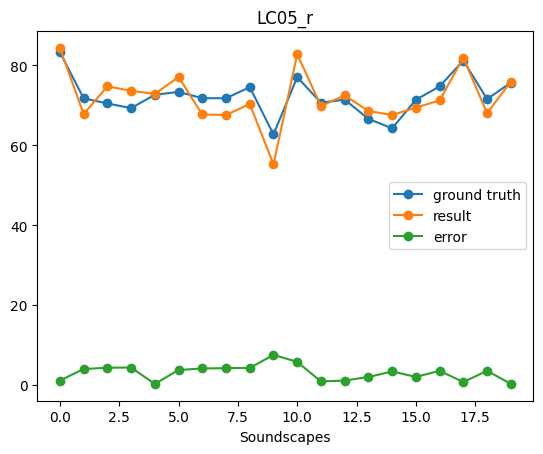

LC10_r


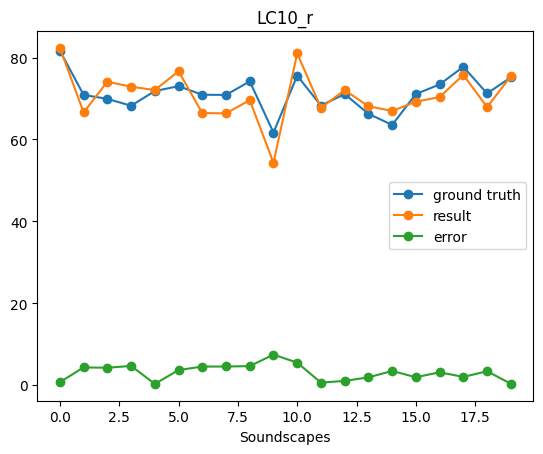

LC20_r


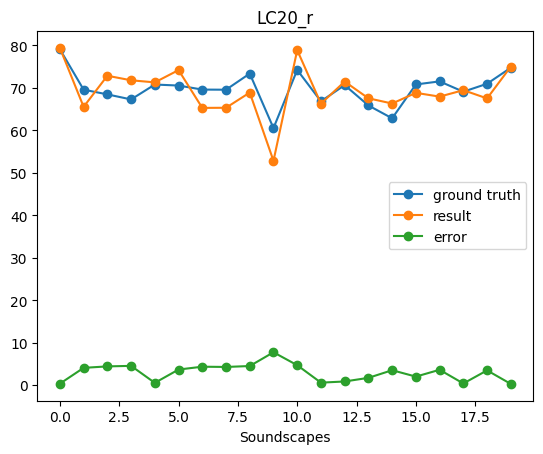

LC30_r


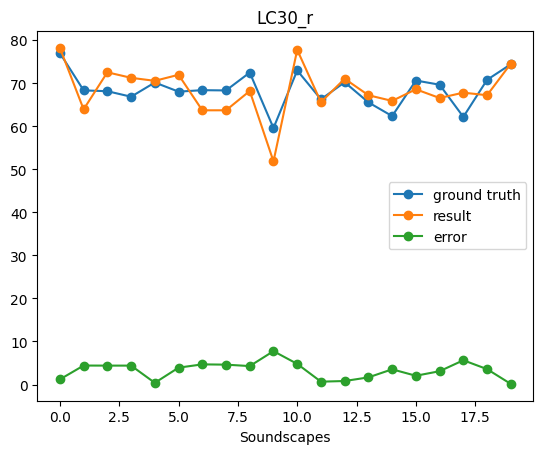

LC40_r


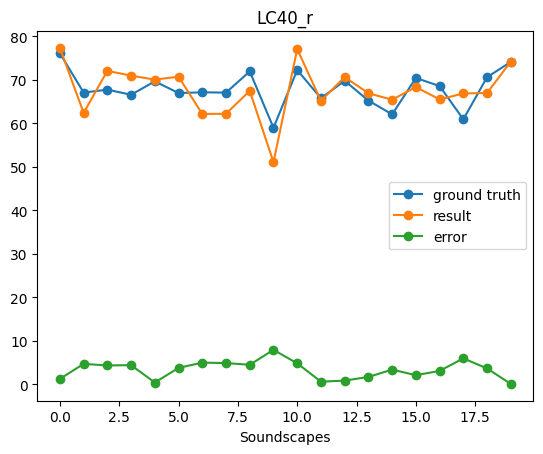

LC50_r


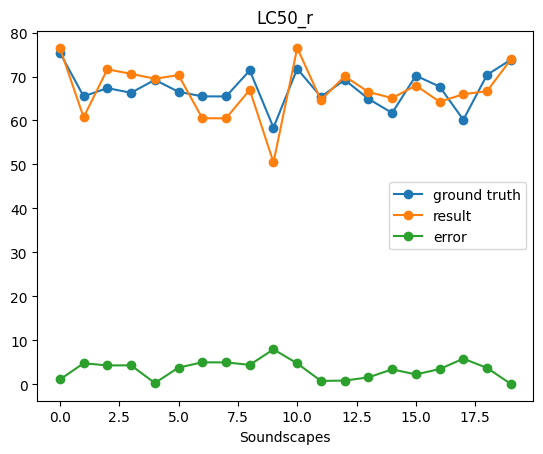

LC60_r


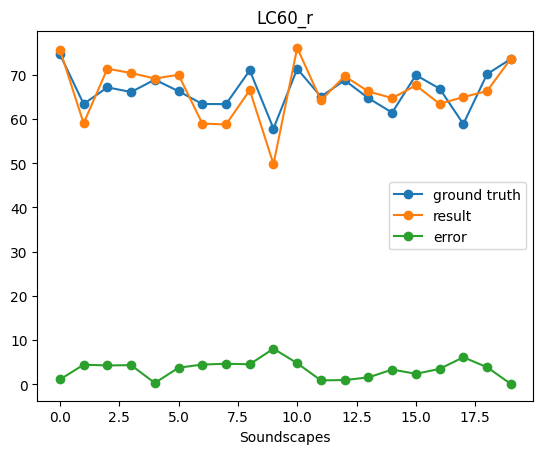

LC70_r


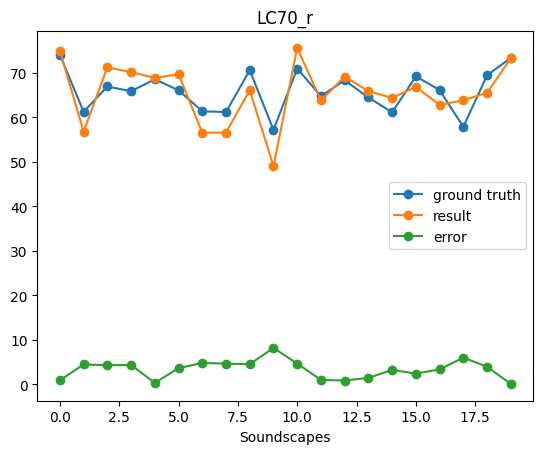

LC80_r


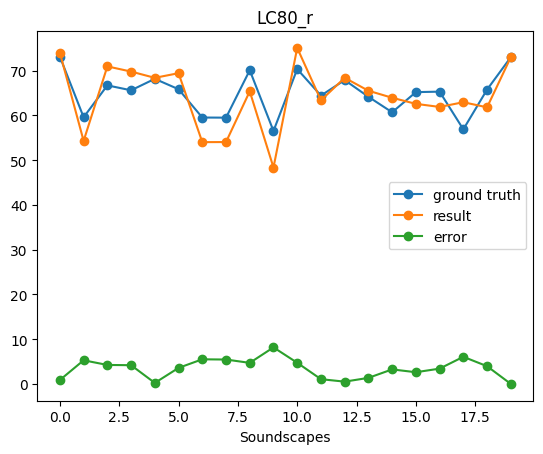

LC90_r


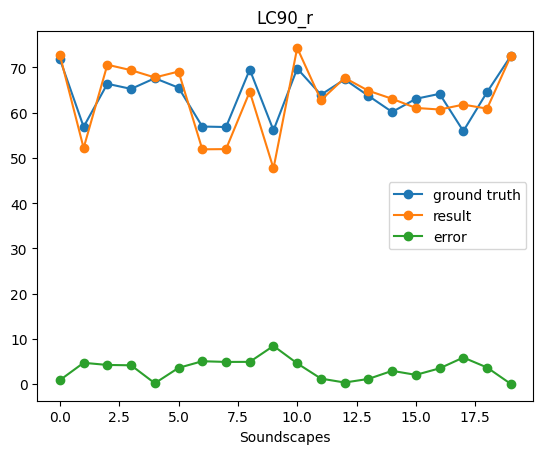

LC95_r


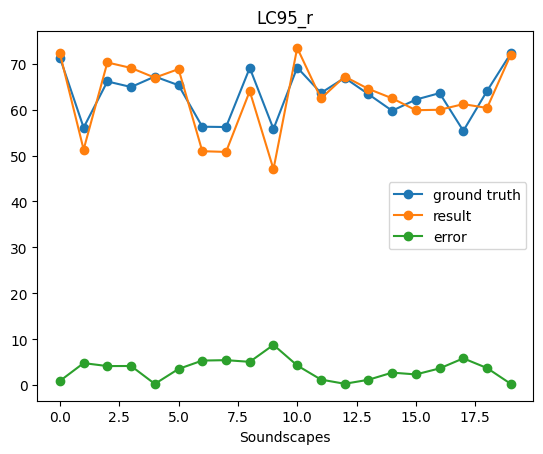

Ravg_r


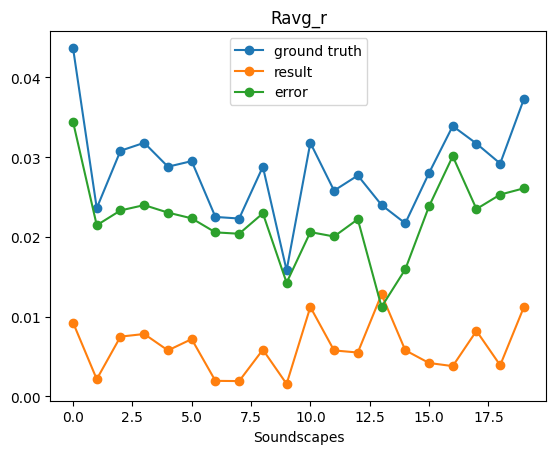

Rmax_r


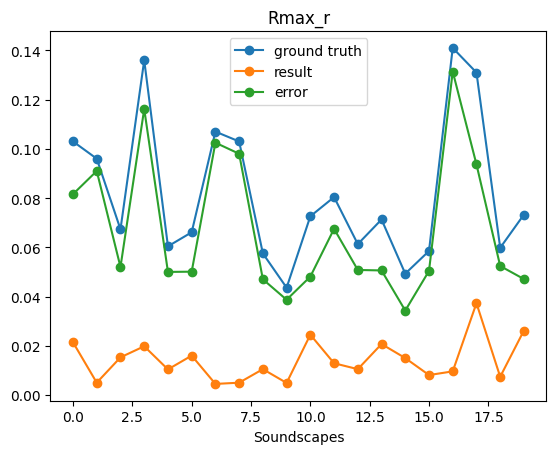

R05_r


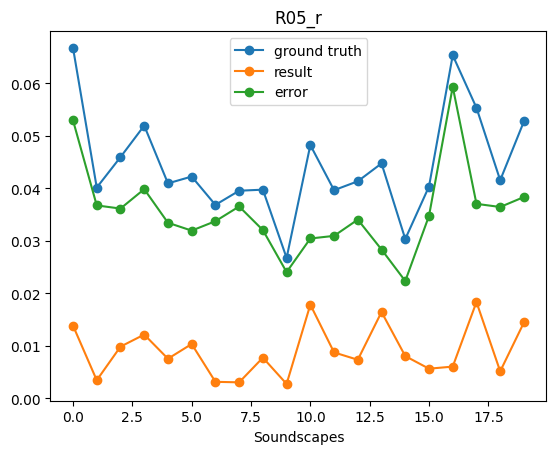

R10_r


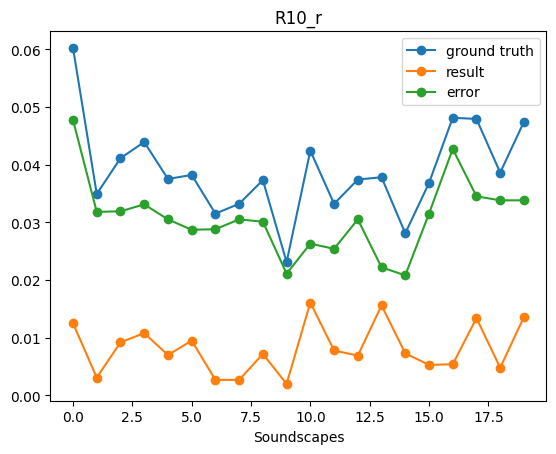

R20_r


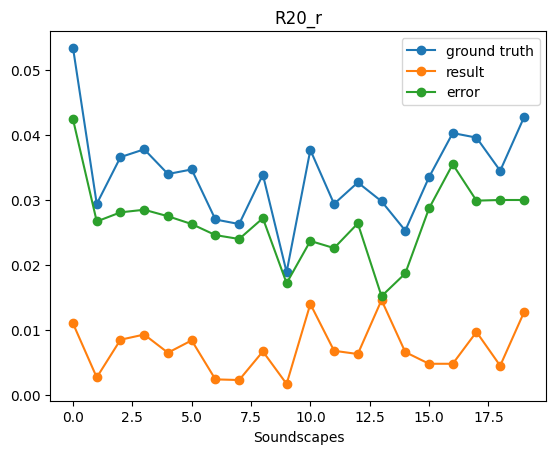

R30_r


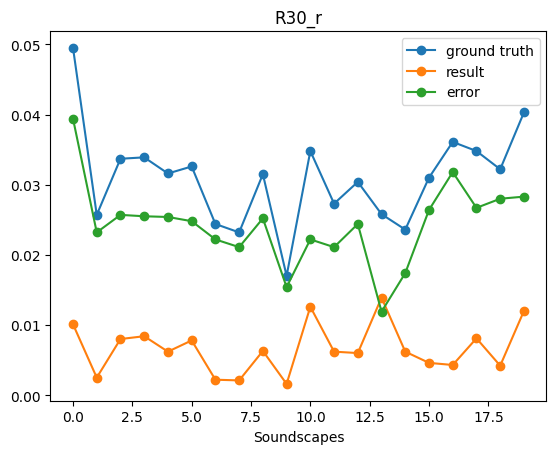

R40_r


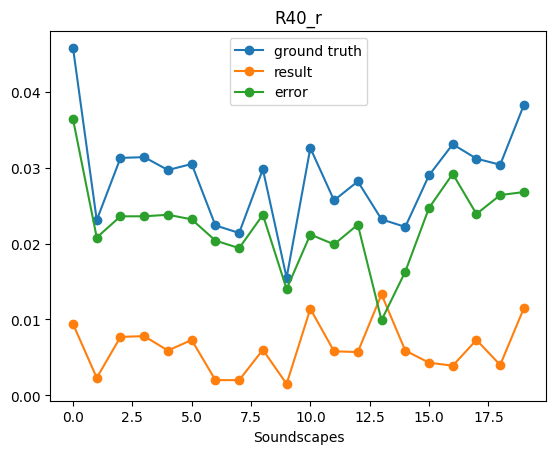

R50_r


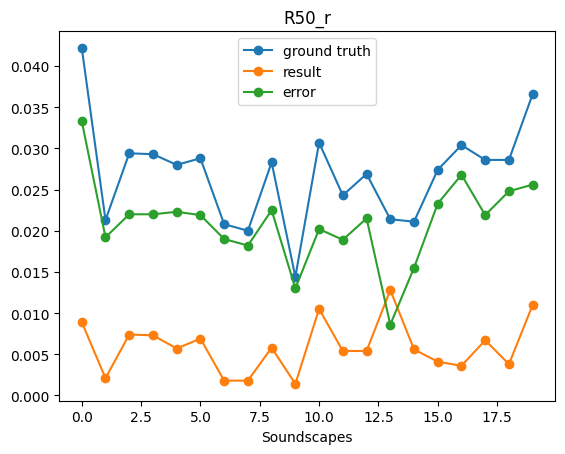

R60_r


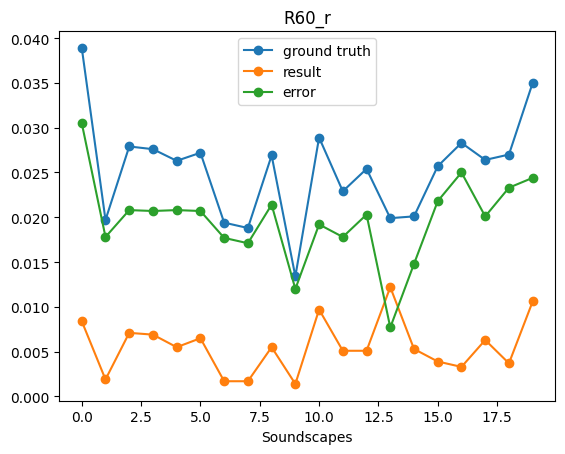

R70_r


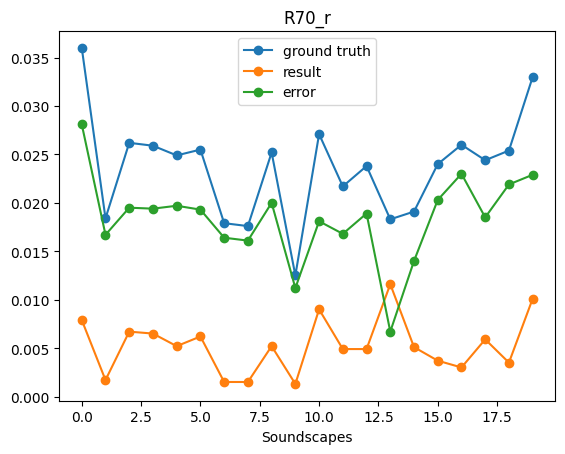

R80_r


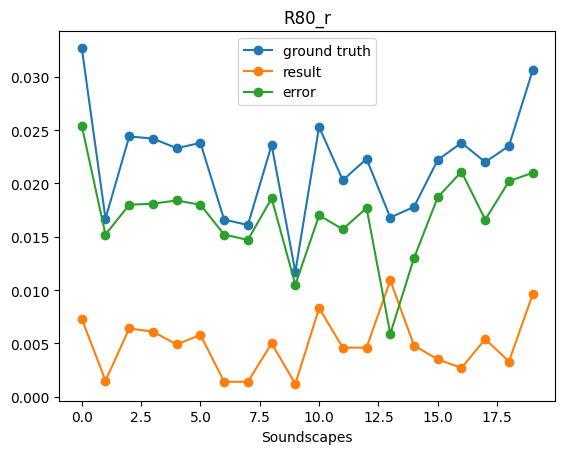

R90_r


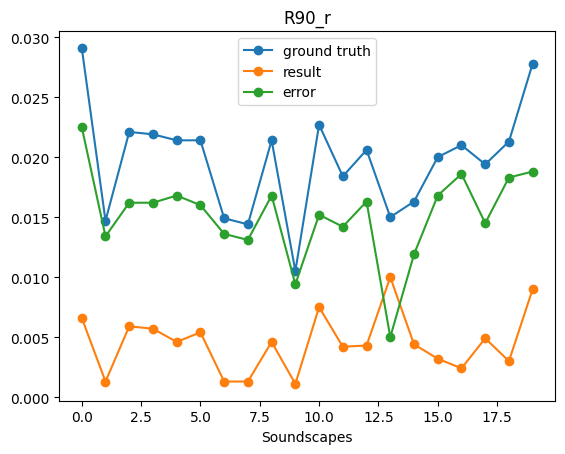

R95_r


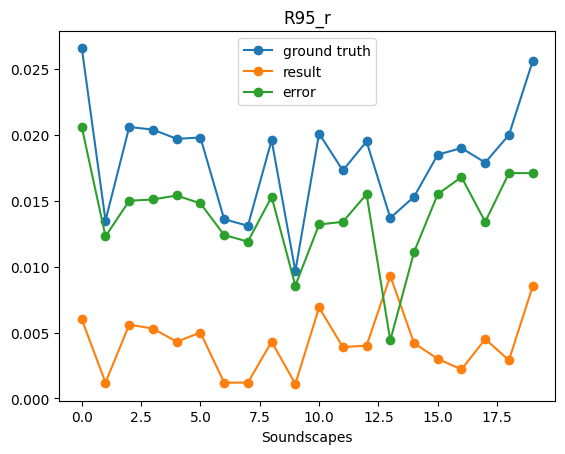

Tgavg_r


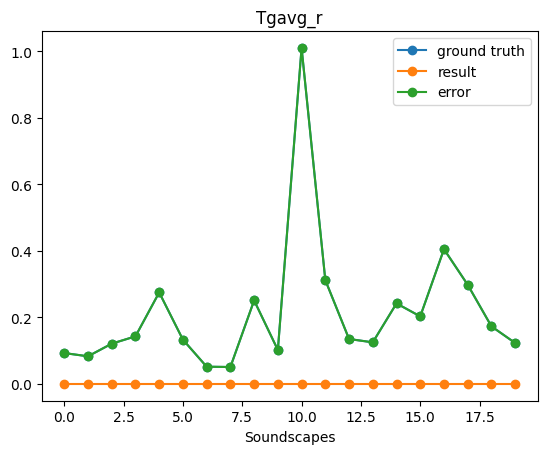

Tavg_r


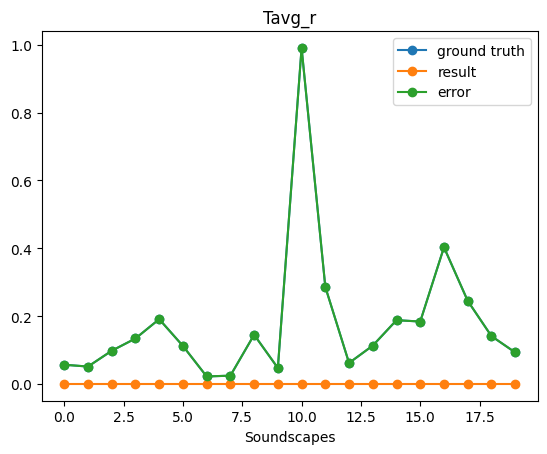

Tmax_r


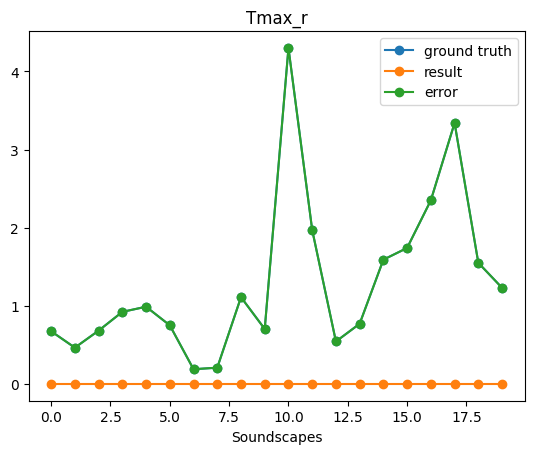

T05_r


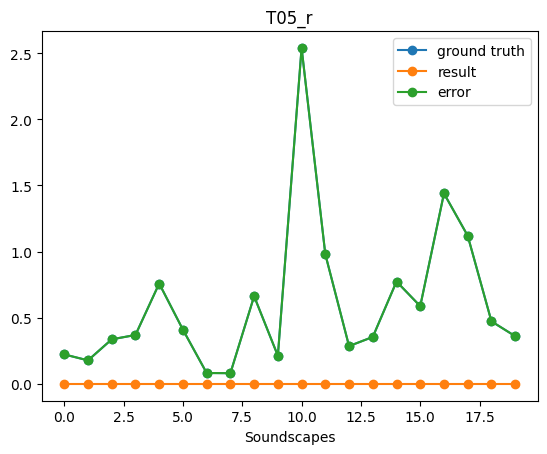

T10_r


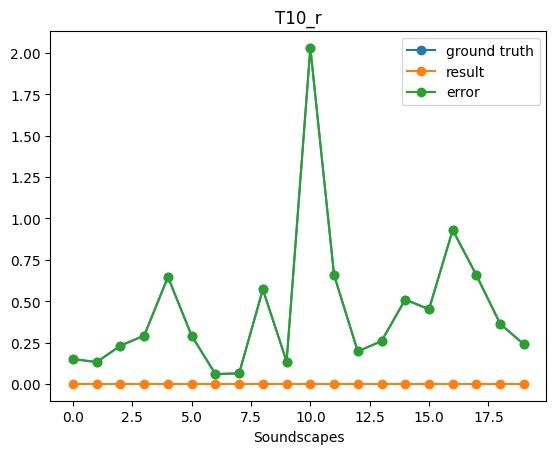

T20_r


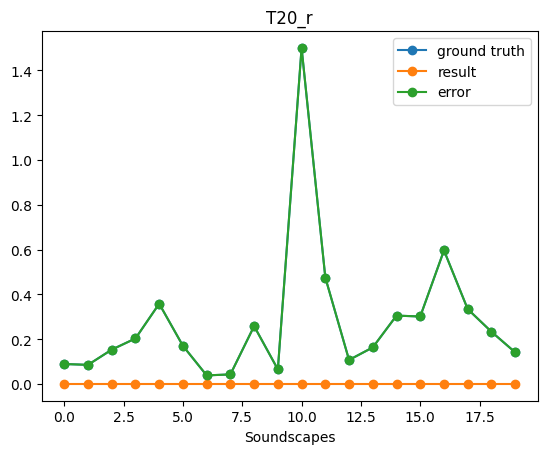

T30_r


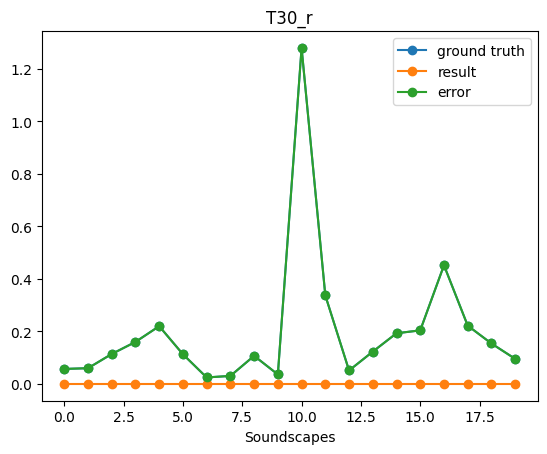

T40_r


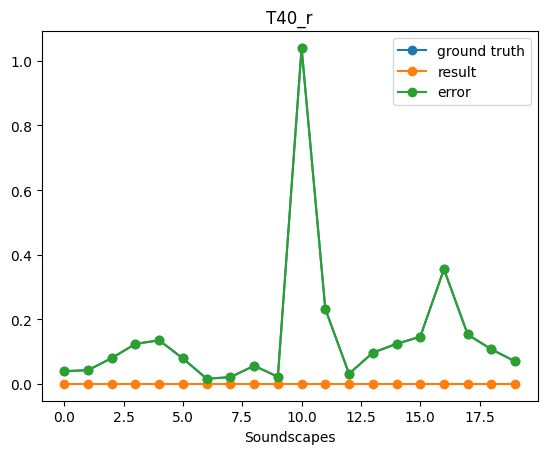

T50_r


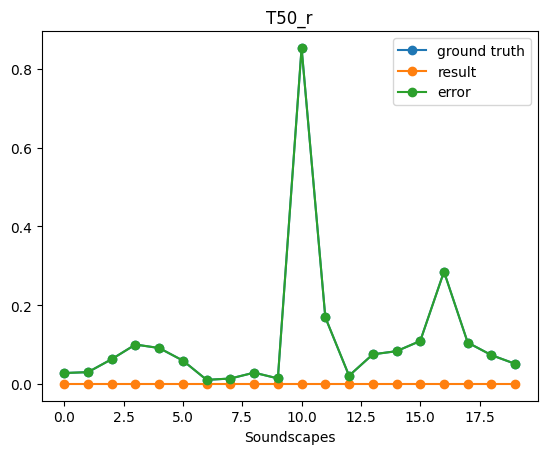

T60_r


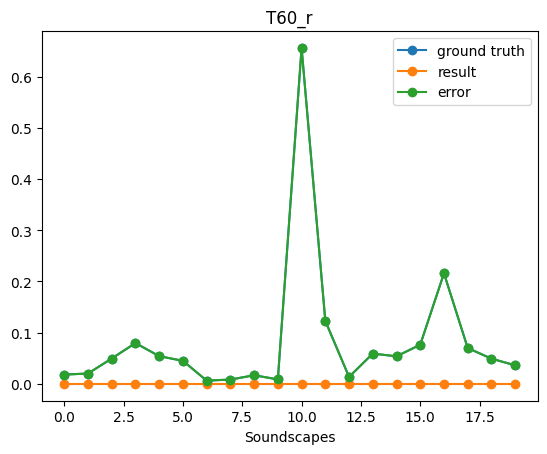

T70_r


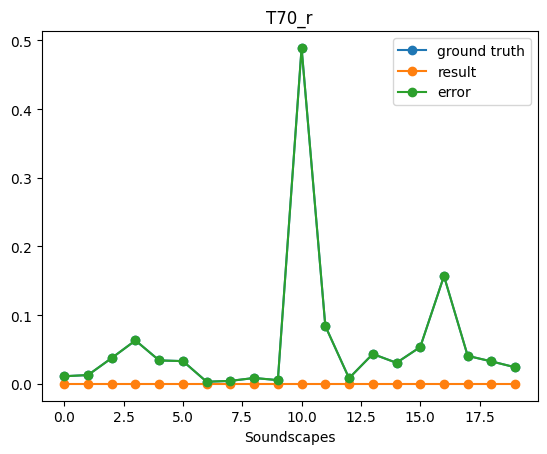

T80_r


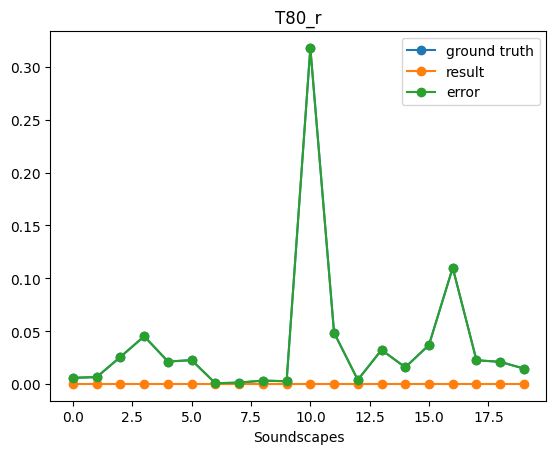

T90_r


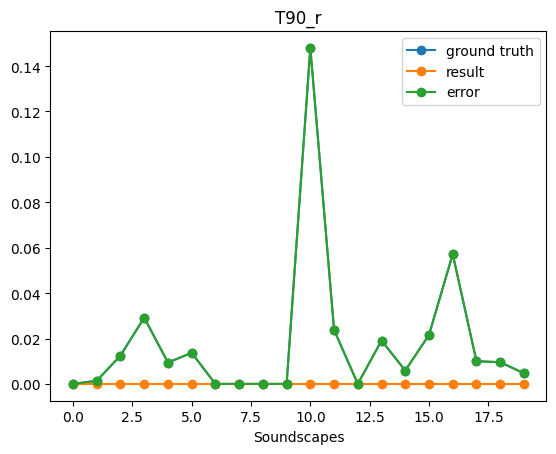

T95_r


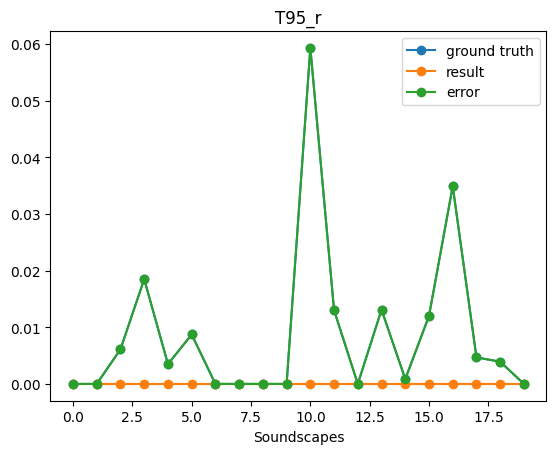

M00005_0_r


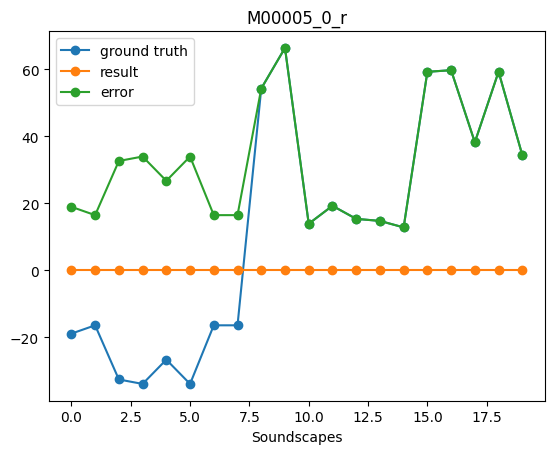

M00006_3_r


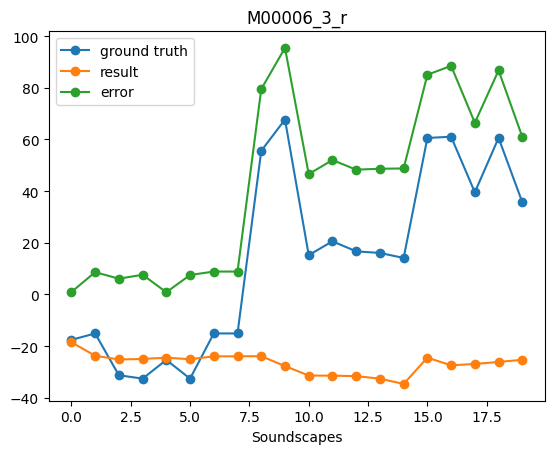

M00008_0_r


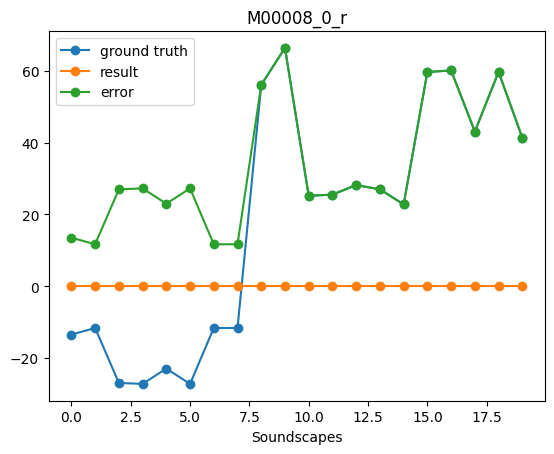

M00010_0_r


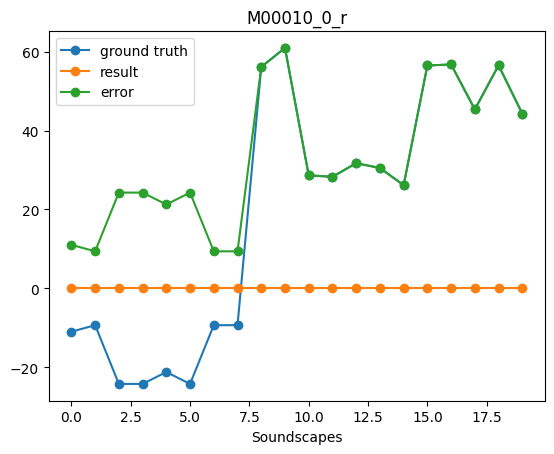

M00012_5_r


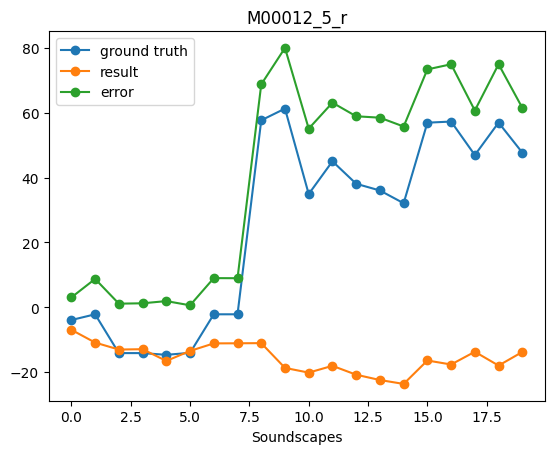

M00016_0_r


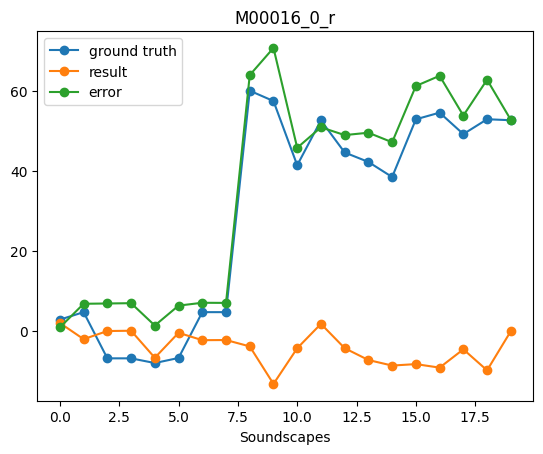

M00020_0_r


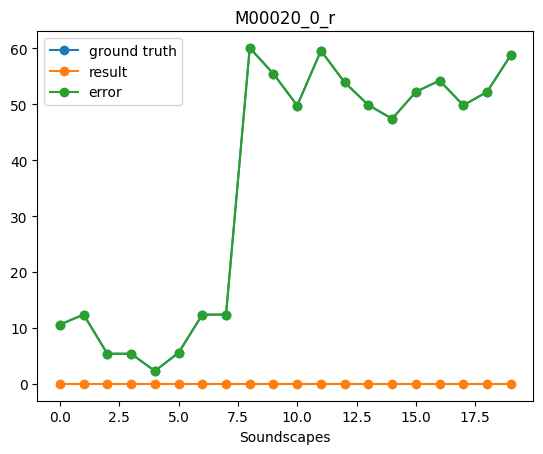

M00025_0_r


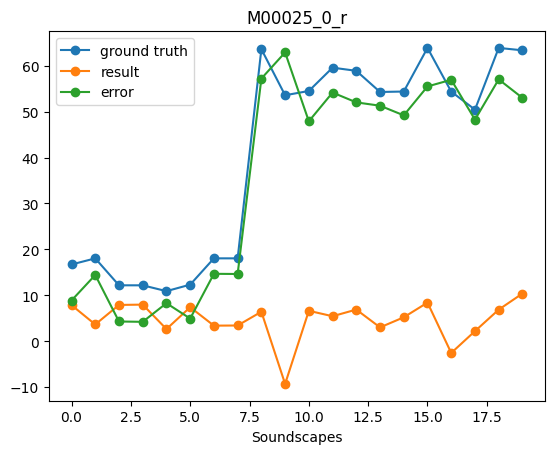

M00031_5_r


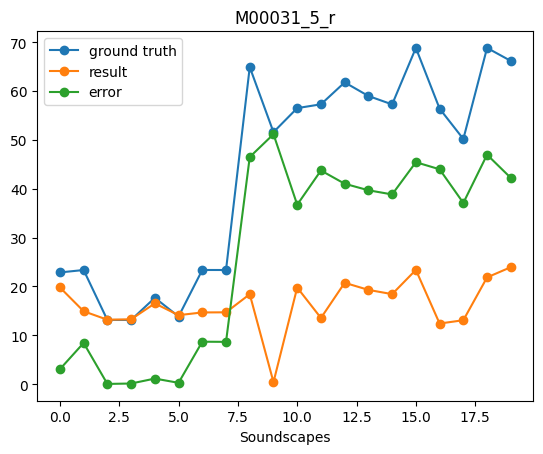

M00040_0_r


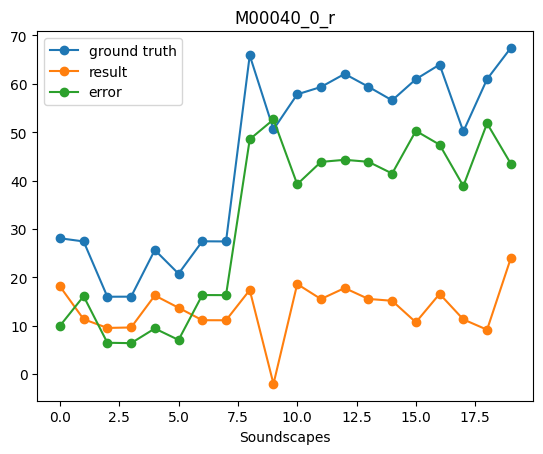

M00050_0_r


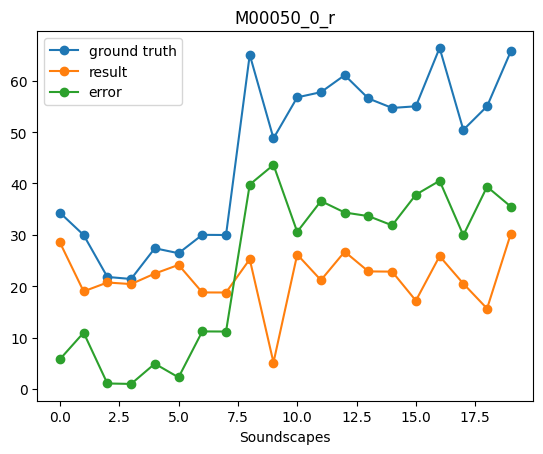

M00063_0_r


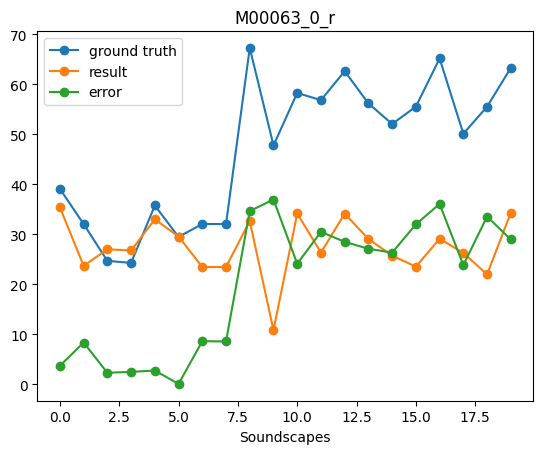

M00080_0_r


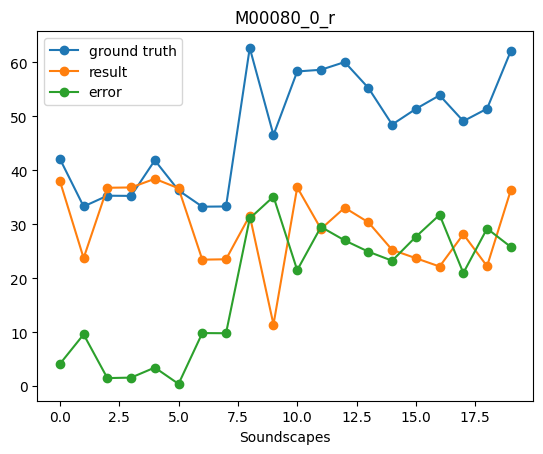

M00100_0_r


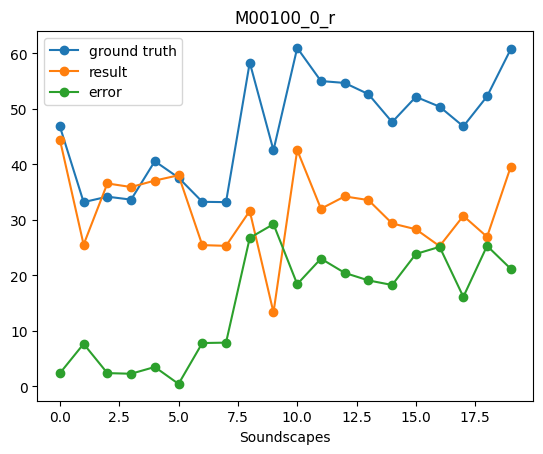

M00125_0_r


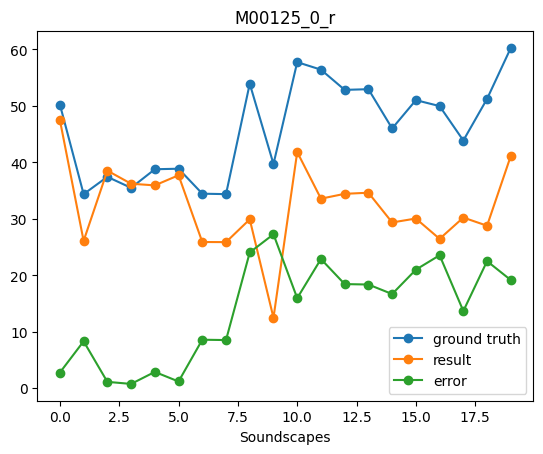

M00160_0_r


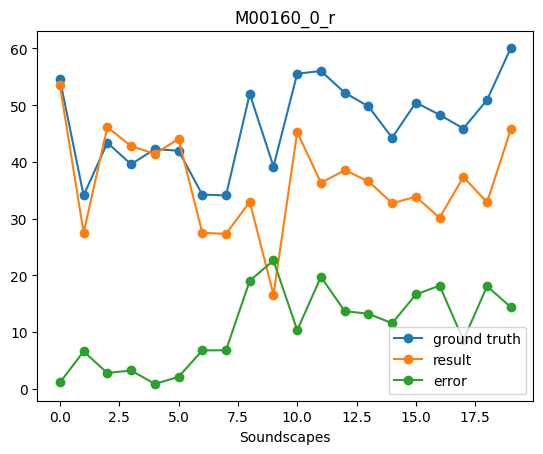

M00200_0_r


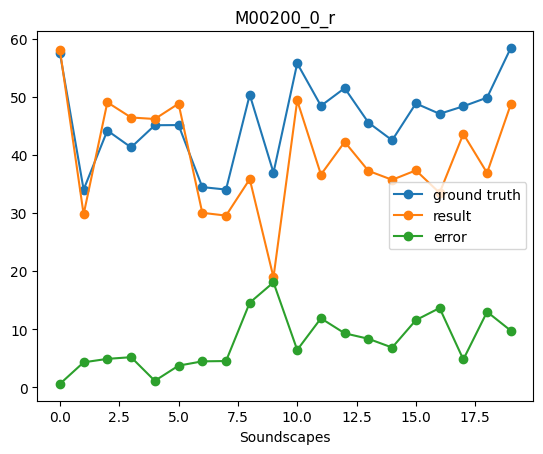

M00250_0_r


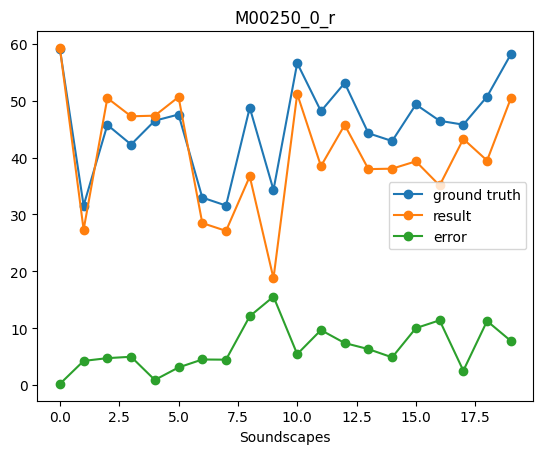

M00315_0_r


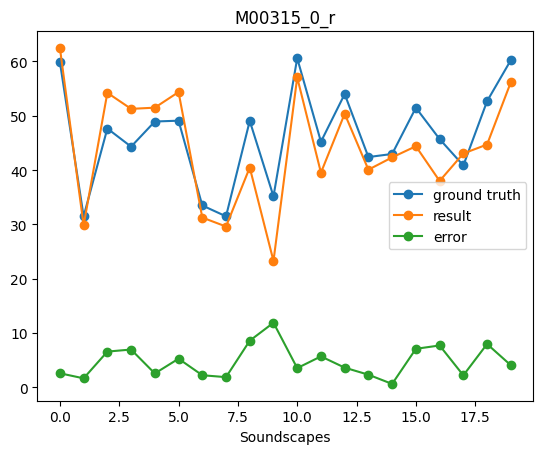

M00400_0_r


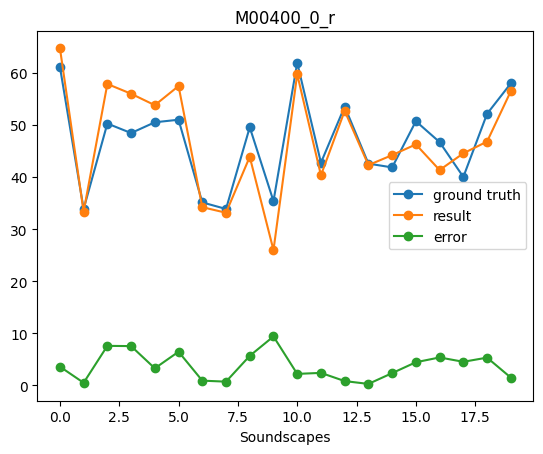

M00500_0_r


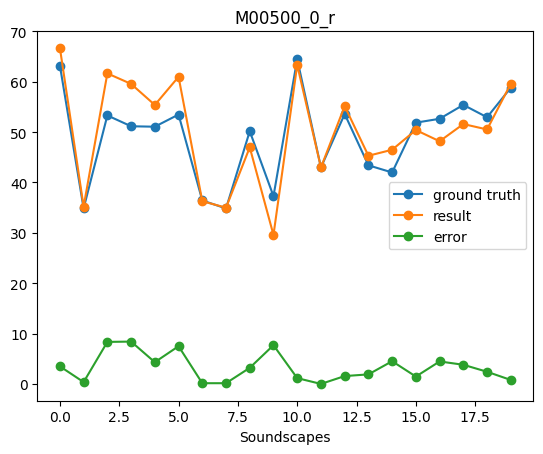

M00630_0_r


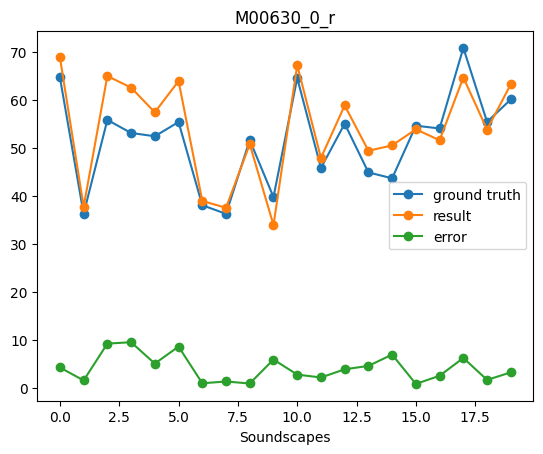

M00800_0_r


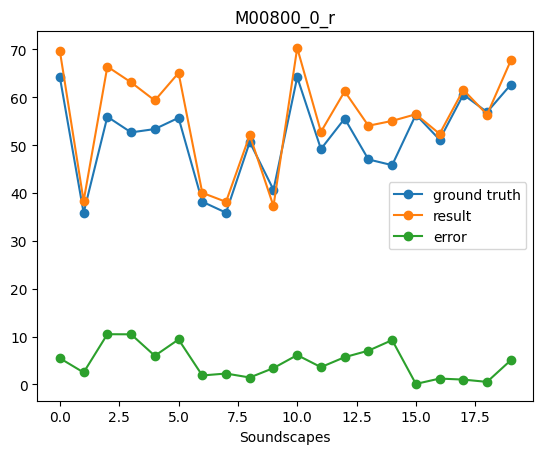

M01000_0_r


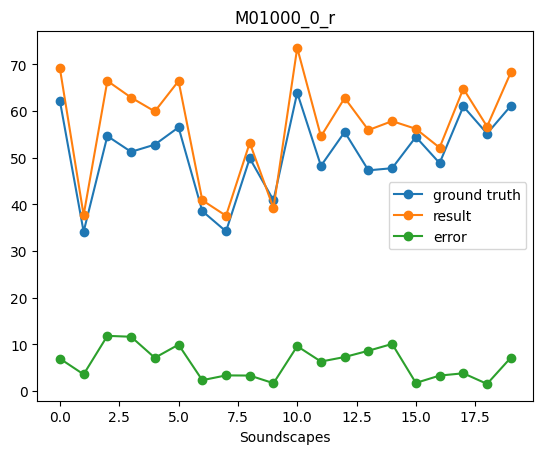

M01250_0_r


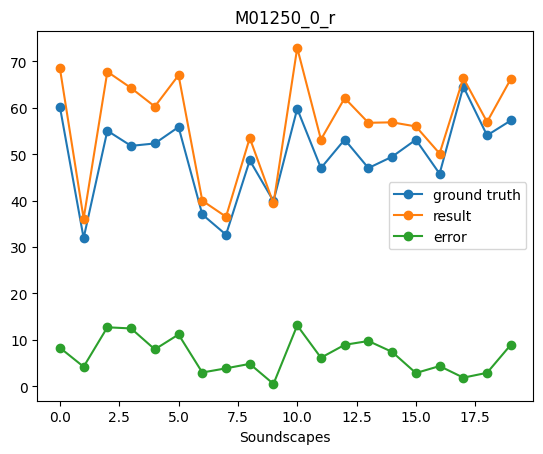

M01600_0_r


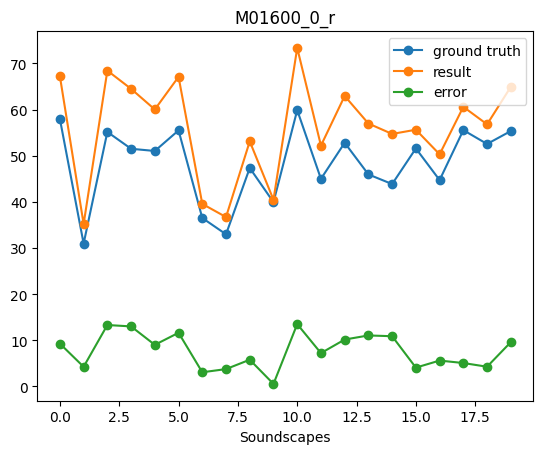

M02000_0_r


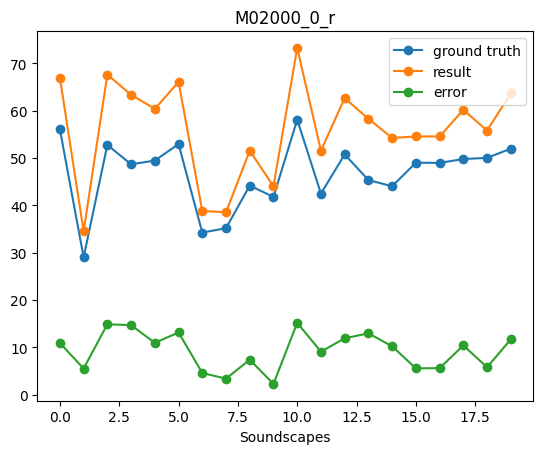

M02500_0_r


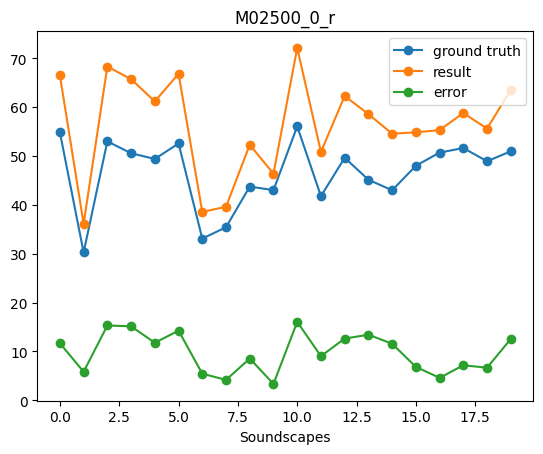

M03150_0_r


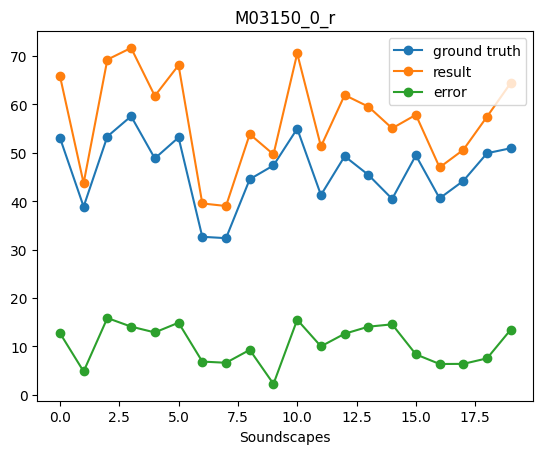

M04000_0_r


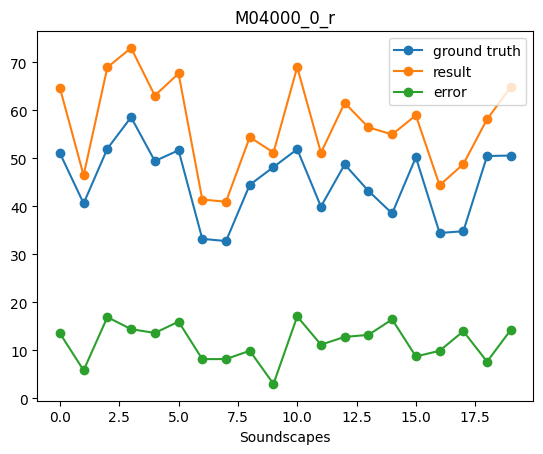

M05000_0_r


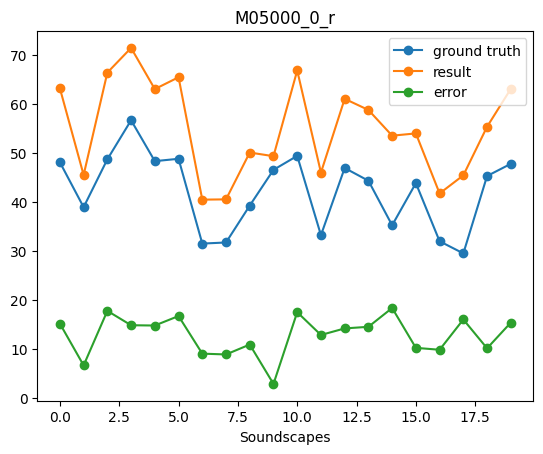

M06300_0_r


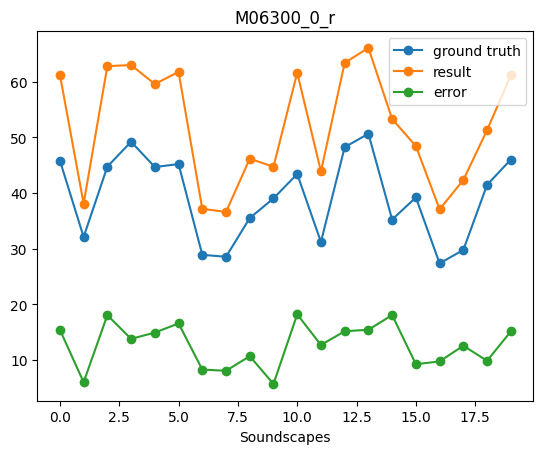

M08000_0_r


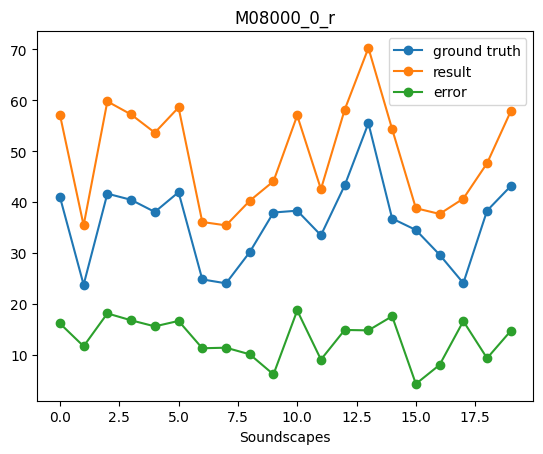

M10000_0_r


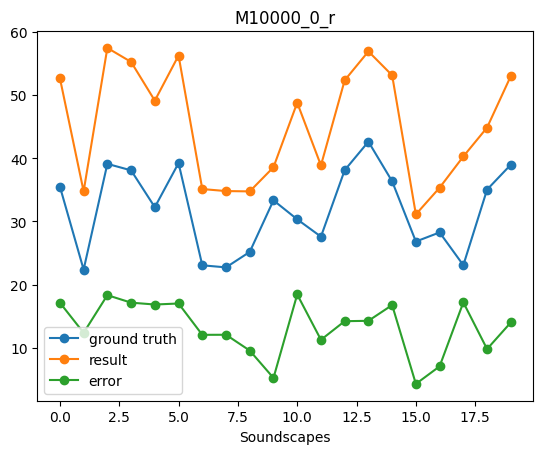

M12500_0_r


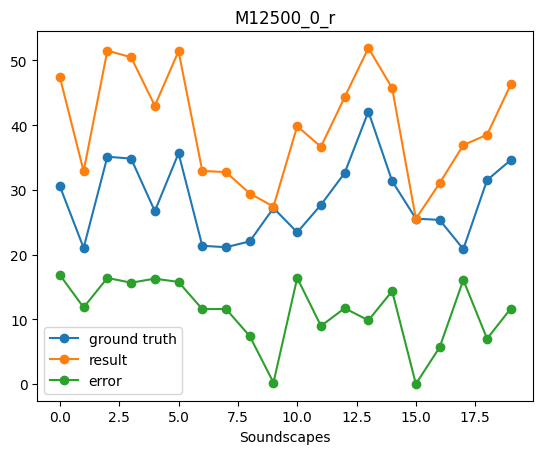

M16000_0_r


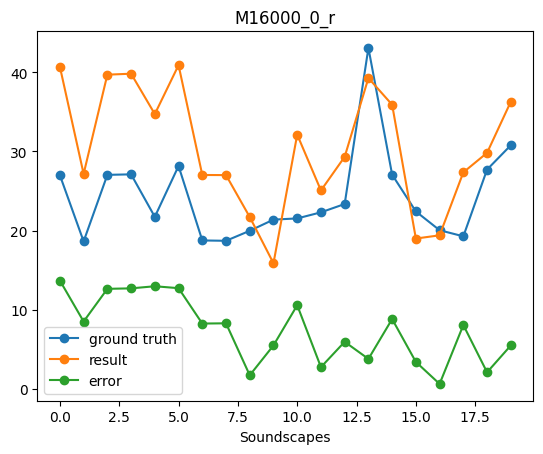

M20000_0_r


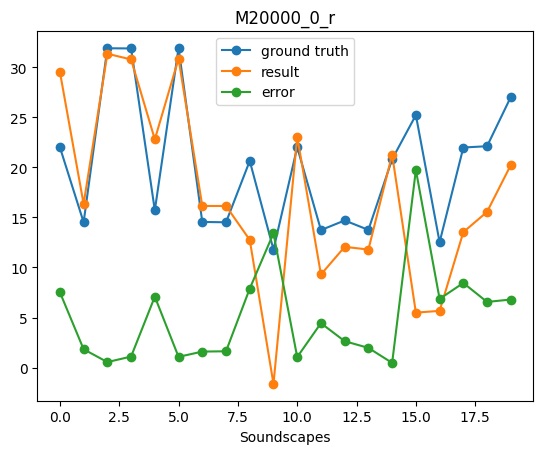

In [3]:
for feature in column_names:
    print(feature)
    if((feature!="soundscape" or feature!="gain")):           
        plt.plot(aug_df[feature], "o-", label="ground truth")
        plt.plot(new_df[feature], "o-", label="result")
        error=np.abs(aug_df[feature]-new_df[feature])
        plt.plot(error, "o-", label="error")
        plt.xlabel('Soundscapes')
        plt.title(feature)
        plt.legend()
        plt.show() 